<a href="https://colab.research.google.com/github/AJ82981/Cardiovascular_Risk_Prediction/blob/main/Classification_Cardiovascular_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    Cardiovascular Risk Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

The Cardiovascular Risk Prediction project aims to develop a predictive model that assesses the risk of cardiovascular diseases in individuals based on their health attributes. Cardiovascular diseases are a leading cause of mortality worldwide, and early detection and risk assessment can lead to timely interventions and improved healthcare outcomes. This project involves utilizing machine learning techniques to analyze medical data and predict the likelihood of an individual developing cardiovascular diseases, providing valuable insights for healthcare professionals and patients.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The core problem addressed in this project is to predict the risk of cardiovascular diseases in individuals based on their health-related attributes. The project seeks to answer questions such as:

- Can we develop a reliable predictive model for identifying individuals at risk of cardiovascular diseases?
- What are the key health attributes that contribute to predicting cardiovascular risk?
- How accurate and interpretable can the predictive model be for healthcare professionals and patients?
- How can the model's predictions contribute to early intervention and prevention strategies?
- What additional insights can be derived from analyzing the relationships between health attributes and cardiovascular risk?

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# from ShuffleSplit import shuffle_split_cv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.svm import SVC

# !pip install shap==0.40.0
# import shap
# import graphviz
# sns.set_style('darkgrid')

# import warnings
# warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


### Dataset Loading

In [3]:
# # Load Dataset
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
file_path = "https://raw.githubusercontent.com/AJ82981/Cardiovascular_Risk_Prediction/main/data_cardiovascular_risk.csv"
# '/content/drive/MyDrive/AlmaBetter/Capstone Projects/Classification - ML Project/data_cardiovascular_risk.csv'

In [5]:
df_org = pd.read_csv(file_path)

### Dataset First View

In [6]:
# Dataset First Look
df = df_org.copy()
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
df.drop('id',axis=1,inplace=True)

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [12]:
cat_vars = ['education','prevalentHyp','sex','is_smoking','BPMeds','prevalentStroke','diabetes','TenYearCHD']
num_vars = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

##### Categorical varibales with missing values
education - 87

BPMeds - 44


###### Replacing missing values in categorical variables with most frequent value

In [13]:
print(df['education'].value_counts(),'\n',df['BPMeds'].value_counts())

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64 
 0.0    3246
1.0     100
Name: BPMeds, dtype: int64


In [14]:
print(df['education'].isna().sum(),'\n',df['BPMeds'].isna().sum())

87 
 44


In [15]:
df['education']=df['education'].fillna(df['education'].mode()[0])
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [16]:
print(df['education'].isna().sum(),'\n',df['BPMeds'].isna().sum())

0 
 0


In [17]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


##### Numerical Variables with missing values
cigsPerDay - 22

totChol - 38

BMI - 14

glucose - 304

###### cigsPerDay

In [18]:
df[(df['cigsPerDay']).isnull()]['is_smoking'].count()

22

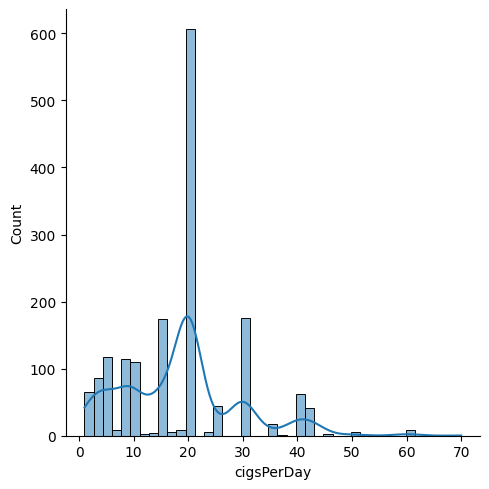

In [19]:
# sns.distplot(df[df['is_smoking']=='YES']['cigsPerDay'])
sns.displot(data=df[df['is_smoking'] == 'YES'], x='cigsPerDay', kde=True)
plt.show()

<Axes: >

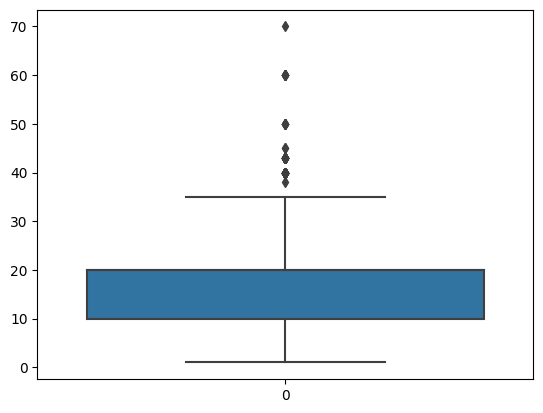

In [20]:
sns.boxplot(df[df['is_smoking']=='YES']['cigsPerDay'])

Since the column contains outliers the missing values can be replaced with the median value of the column

In [21]:
df['cigsPerDay'].isna().sum()

22

In [22]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [23]:
df['cigsPerDay'].isna().sum()

0

In [24]:
df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [25]:
# Check Unique Values for each variable.
print(f'The unique value for :\n')
for i in df.columns:
  print(f'{i} :',df[i].nunique())

The unique value for :

age : 39
education : 4
sex : 2
is_smoking : 2
cigsPerDay : 32
BPMeds : 2
prevalentStroke : 2
prevalentHyp : 2
diabetes : 2
totChol : 240
sysBP : 226
diaBP : 142
BMI : 1259
heartRate : 68
glucose : 132
TenYearCHD : 2


In [26]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###### BMI, totChol and heartRate - Replacing missing values with most frequent value

In [27]:
print('BMI -',df['BMI'].isnull().sum(),'\n',
      'totChol -',df['totChol'].isnull().sum(),'\n',
      'heartRate -',df['heartRate'].isnull().sum())

BMI - 14 
 totChol - 38 
 heartRate - 1


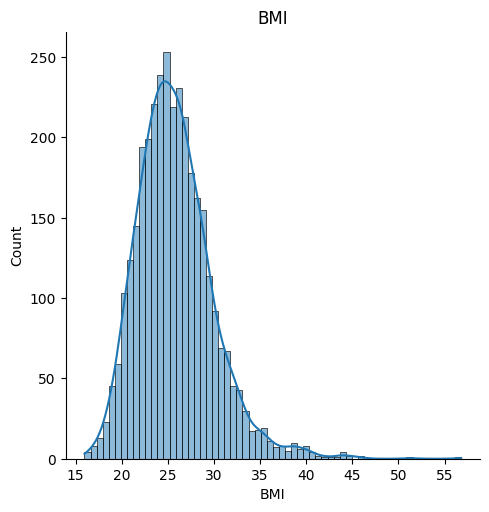

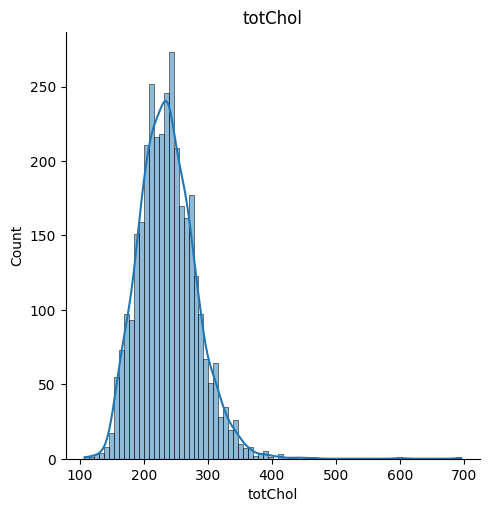

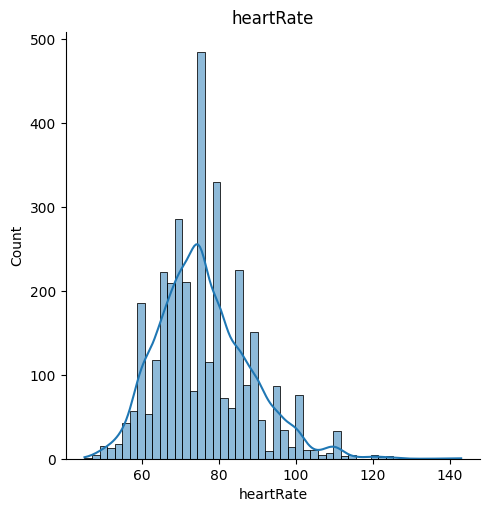

In [28]:
for i in ['BMI','totChol','heartRate']:
  sns.displot(data=df, x=i, kde=True)
  plt.title(i)
  plt.show()

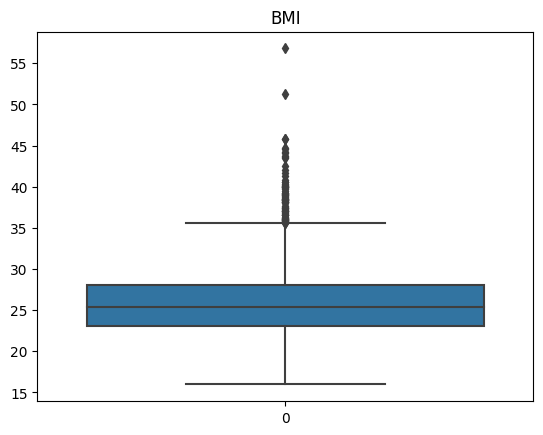

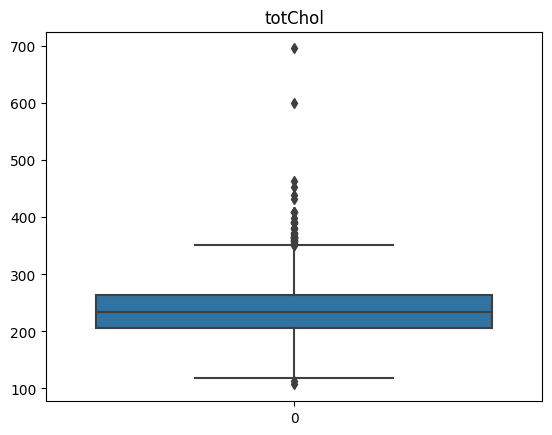

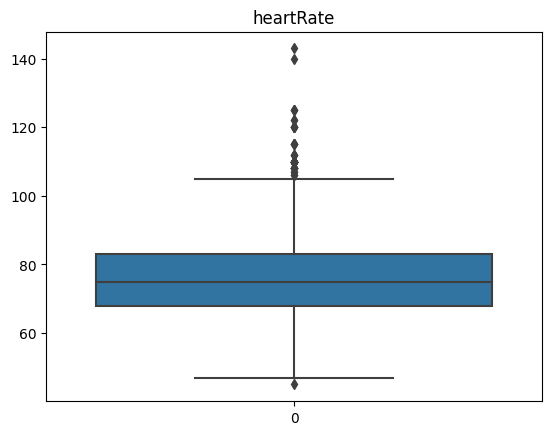

In [29]:
for i in ['BMI','totChol','heartRate']:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

BMI, totChol and heartRate consists of outliers, hence we can replace the missing values with the median of the respected columns

In [30]:
for i in ['BMI','totChol','heartRate']:
  print(df[i].isna().sum())

14
38
1


In [31]:

for i in ['BMI','totChol','heartRate']:
  df[i] = df[i].fillna(df[i].median())

In [32]:
for i in ['BMI','totChol','heartRate']:
  print(df[i].isna().sum())

0
0
0


In [33]:
# Visualizing the missing values

In [34]:
# Write your code to make your dataset analysis ready.

### What did you know about your dataset?

The dataset provided is from an ongoing cardiovascular study.

The dataset consists of 17 columns and has 3390 entries, classification goal is to predict 10-year risk of future coronary heart disease 'TenYearCHD' for an individual.

The missing values is found in the following columns:


- education           87
- cigsPerDay          22
- BPMeds              44
- totChol             38
- BMI                 14
- heartRate            1
- glucose            304

## ***2. Understanding Your Variables***

In [35]:
# Dataset Columns
print('Columns:\n',df.columns,'\n',df.shape)

Columns:
 Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object') 
 (3390, 16)


In [36]:
# Dataset Describe
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3086.000000,3390.000000
mean,49.542183,1.946018,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,82.086520,0.150737
std,8.592878,1.017568,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

- id : It has 3390 unique entries for id
- age : Numerical data Consists of the age for an individual
- education : 4
- sex : Categorical Data with entries as M/F
- is_smoking : Categorical Data with entries as Y/N
- cigsPerDay : Numerical data consisting of the number of cigrettes smoked per day ranging from 0-70
- BPMeds : Categorical data with entries as 0-No/1-Yes
- prevalentStroke : Categorical data with entries as 0-No/1-Yes
- prevalentHyp : Consists the info about history with hypertension
- diabetes : Categorical data of a individual having diabetes or not
- totChol : Numerical data on Cholestrol measure of an idividual anging from 107-696
- sysBP : Numerical data on systolic BP Measure ranging from 83.5-295
- diaBP : Numerical data BP measure ranging from 48-142.5
- BMI : Numerical data of BMI of an individual ranging from 15.96-56.8
- heartRate : Numerical data for heart rate
- glucose : Numerical data for glucose
- TenYearCHD : Categorical Target variable having classification as 0/1

### Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis (U)**

##### Chart - 1 - Categorical Varibles  Distribution - Count Plot

In [37]:
# Chart - 1 visualization code

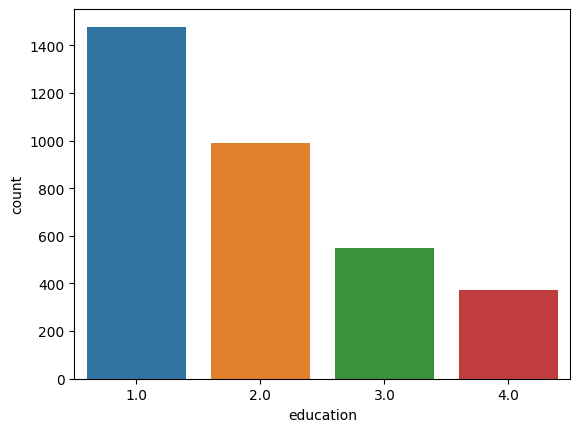

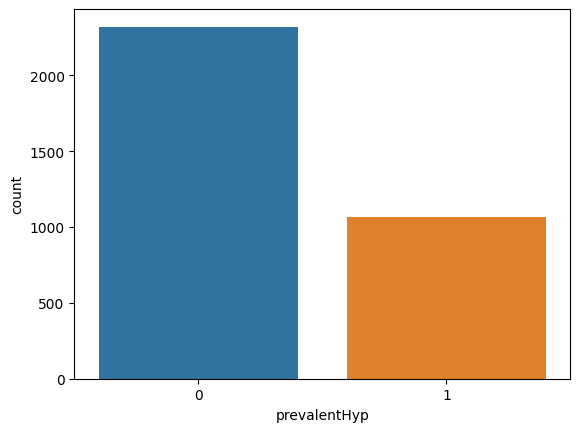

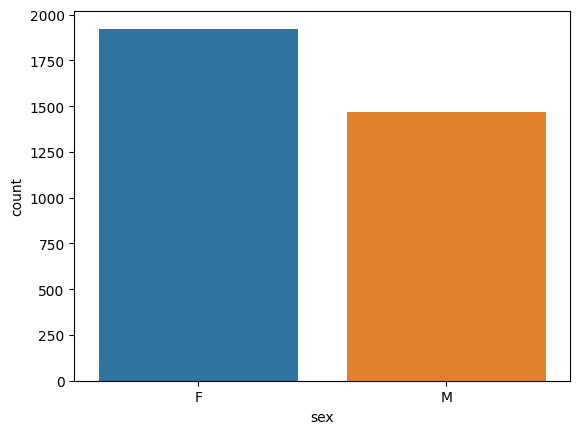

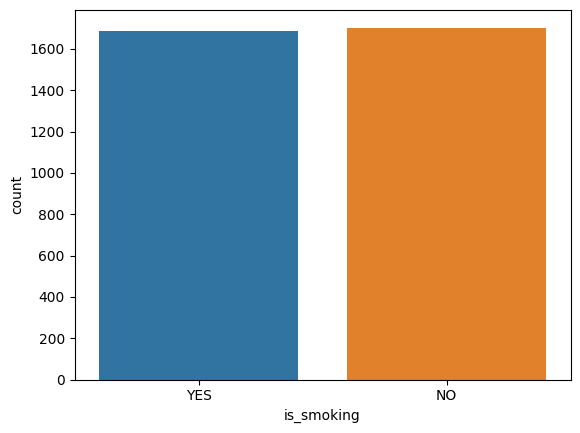

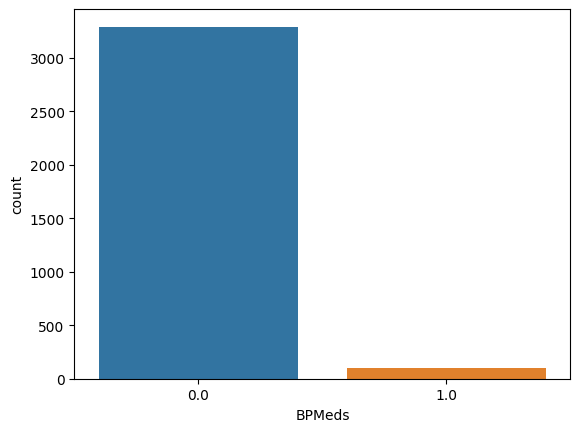

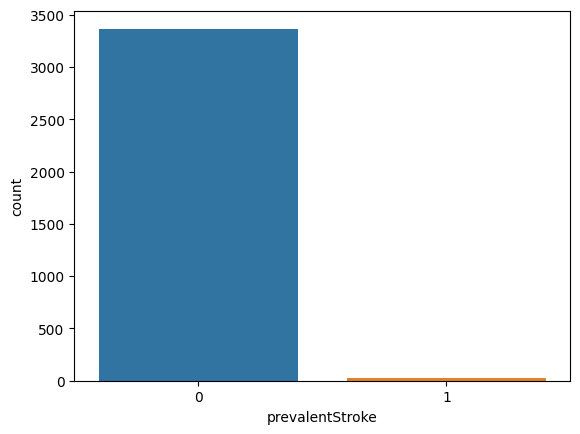

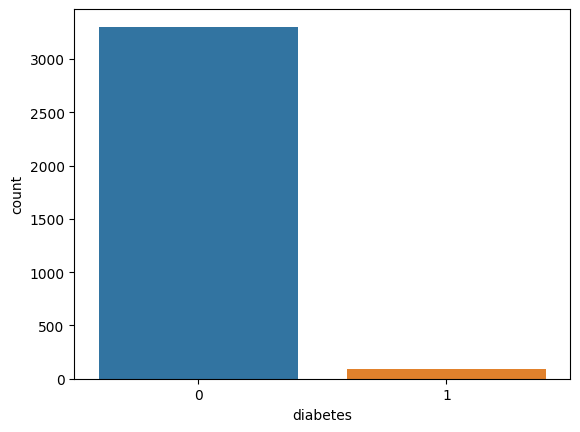

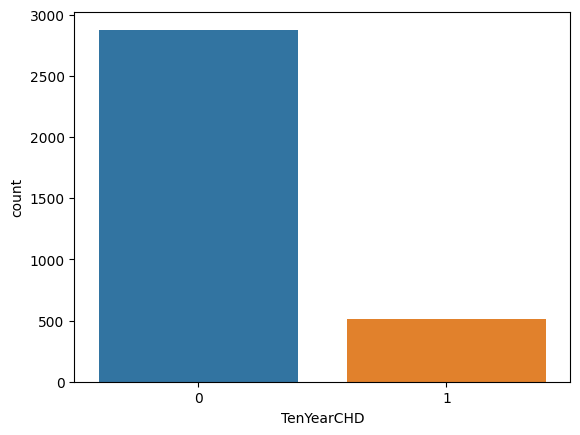

In [38]:
for i in df[cat_vars].columns.tolist():
  sns.countplot(x=df[i])
  plt.xlabel(i)
  plt.show()

In [39]:
# # Iterate through each categorical variable
# for i in df[cat_vars].columns.tolist():
#     # Calculate the value counts for each category
#     value_counts = df[i].value_counts()

#     # Sort the categories by count (optional)
#     value_counts = value_counts.sort_index()

#     # Create a bar plot
#     plt.figure(figsize=(8, 5))  # Set custom plot size
#     value_counts.plot(kind='bar')

#     plt.xlabel(i)
#     plt.ylabel("Count")
#     plt.title(f"Bar Plot of {i}")
#     plt.xticks(rotation=90)  # Rotate x-axis labels for readability
#     plt.show()

 1. Why did you pick the specific chart?

Answer Here.

 2. What is/are the insight(s) found from the chart?

Answer Here

 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### Chart - 2 - Numerical Variable Distribution - Distplot

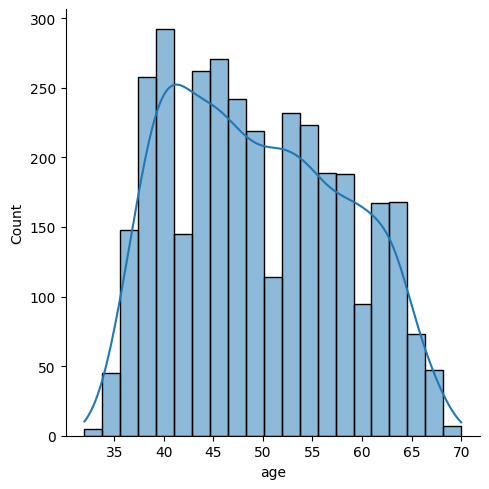

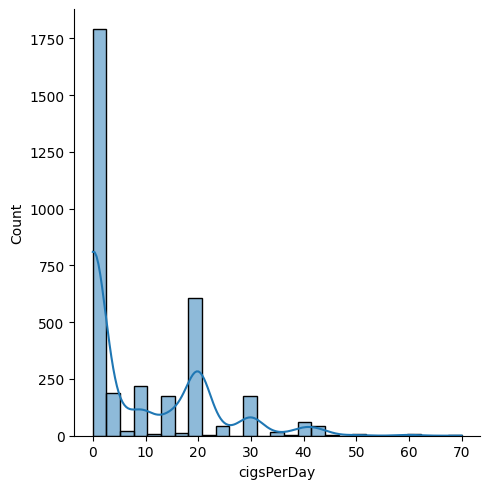

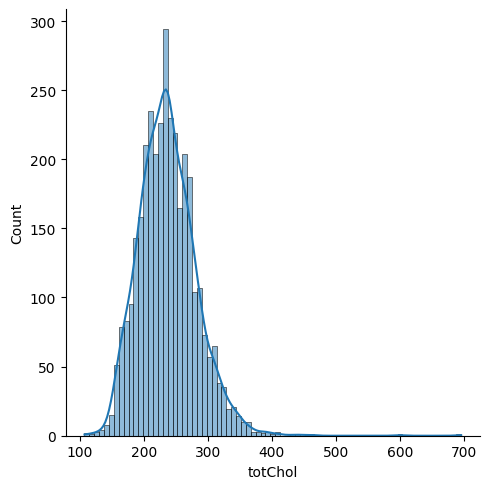

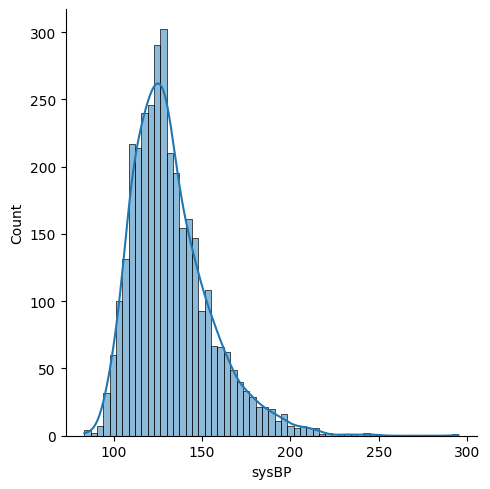

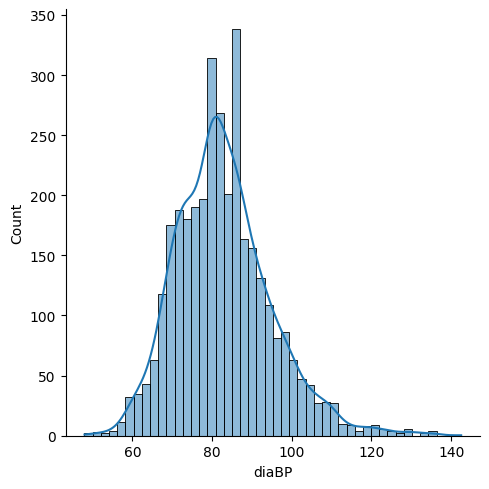

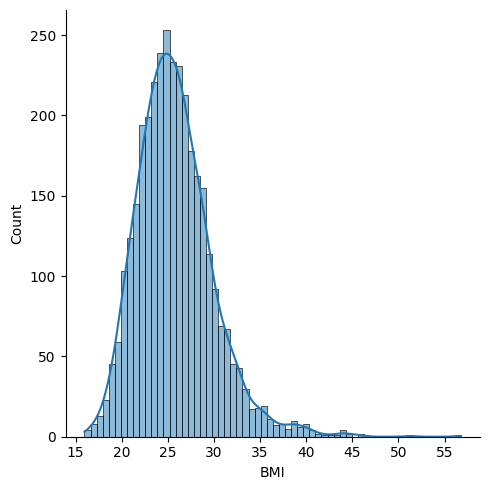

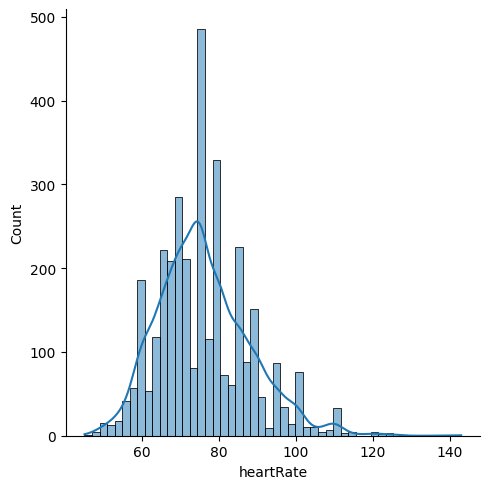

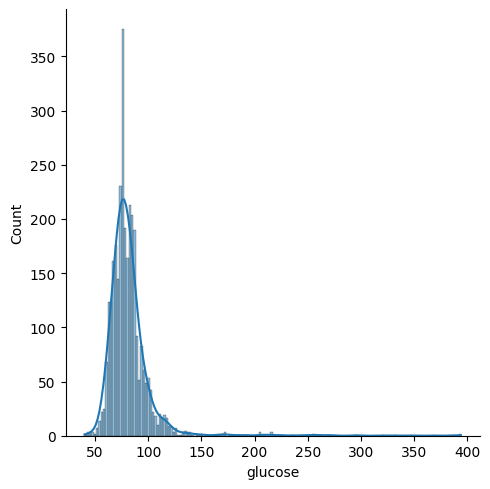

In [40]:
for i in df[num_vars].columns.tolist():
  # sns.distplot(x=df[i])
  sns.displot(data=df, x=i, kde=True)
  plt.xlabel(i)
  plt.show()

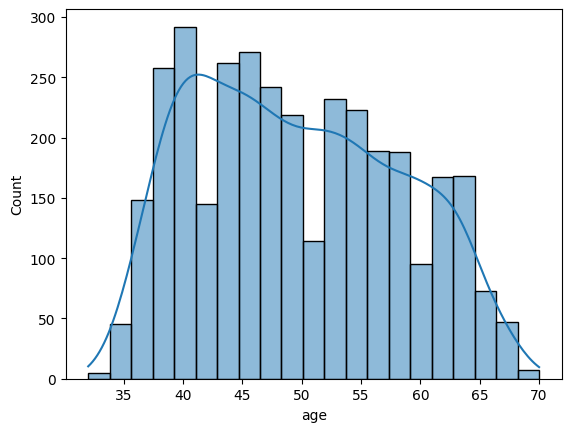

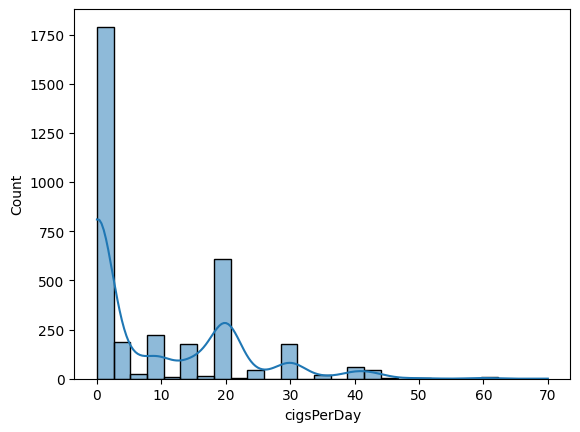

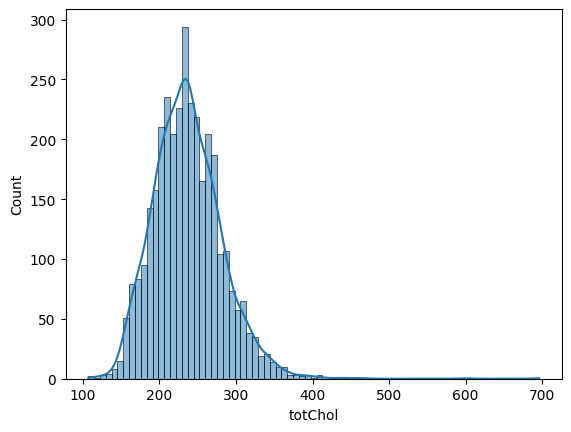

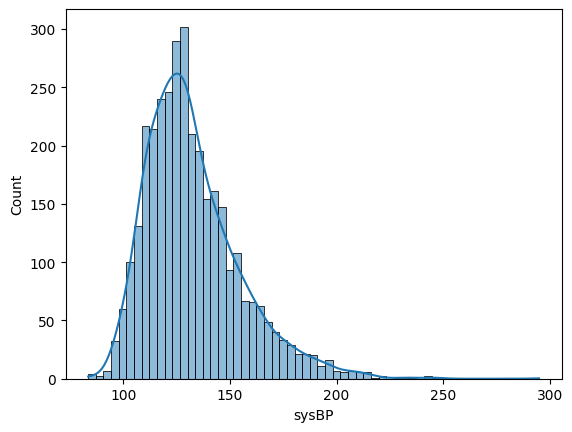

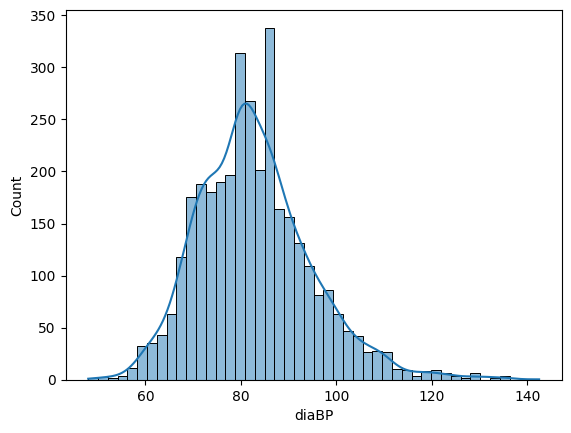

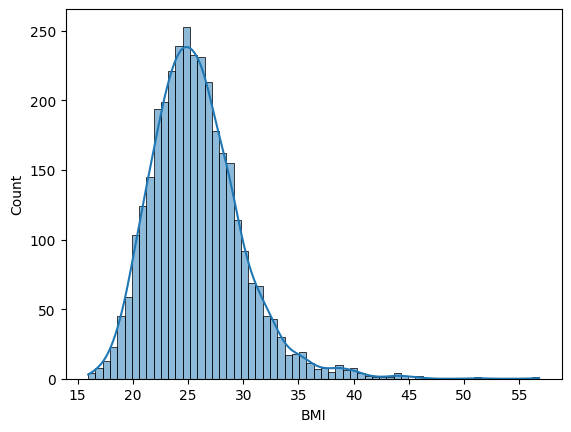

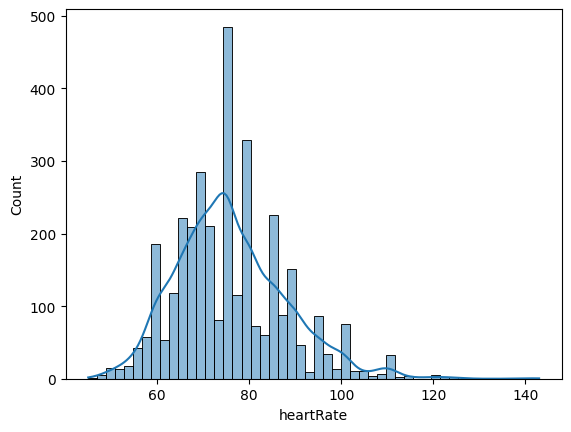

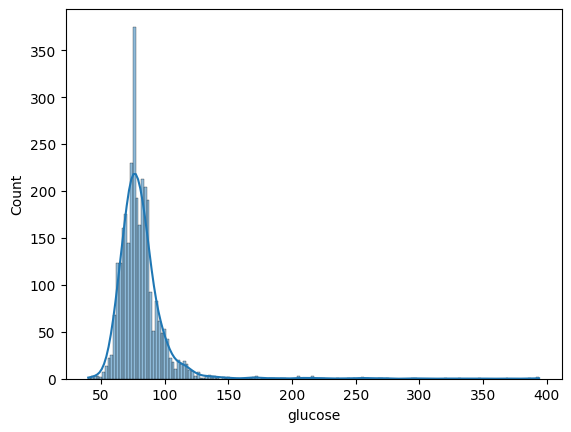

In [41]:

for i in df[num_vars].columns.tolist():
  # sns.distplot(x=df[i])
  sns.histplot(data=df, x=i, kde=True)
  plt.xlabel(i)
  plt.show()

 1. Why did you pick the specific chart?

Answer Here.

 2. What is/are the insight(s) found from the chart?

Answer Here

 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Bivariate Analysis (B)**

#### *Categorical-Numerical*

##### Chart - 3 - Categorical vs age

In [42]:
# Chart - 3 visualization code

In [43]:
print('numerical variables are: \n',num_vars,'\n','categorical variables are: \n',cat_vars)

numerical variables are: 
 ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] 
 categorical variables are: 
 ['education', 'prevalentHyp', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'diabetes', 'TenYearCHD']


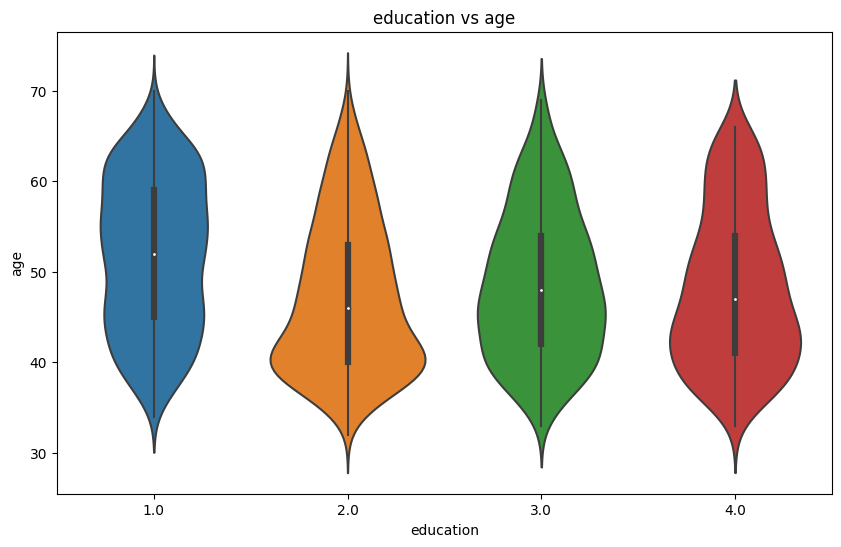

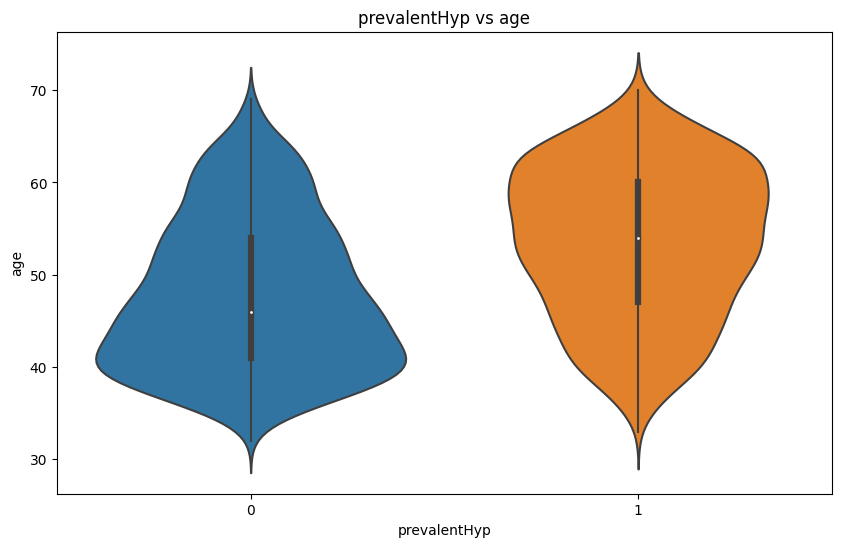

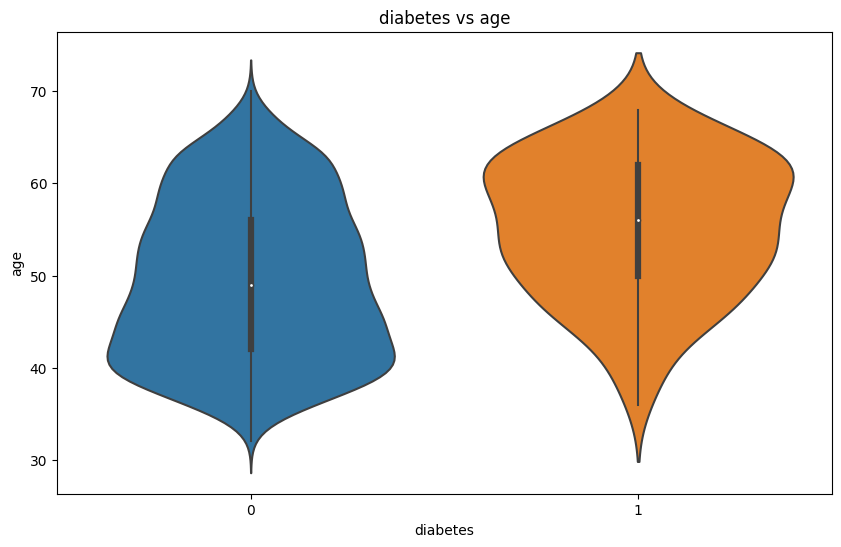

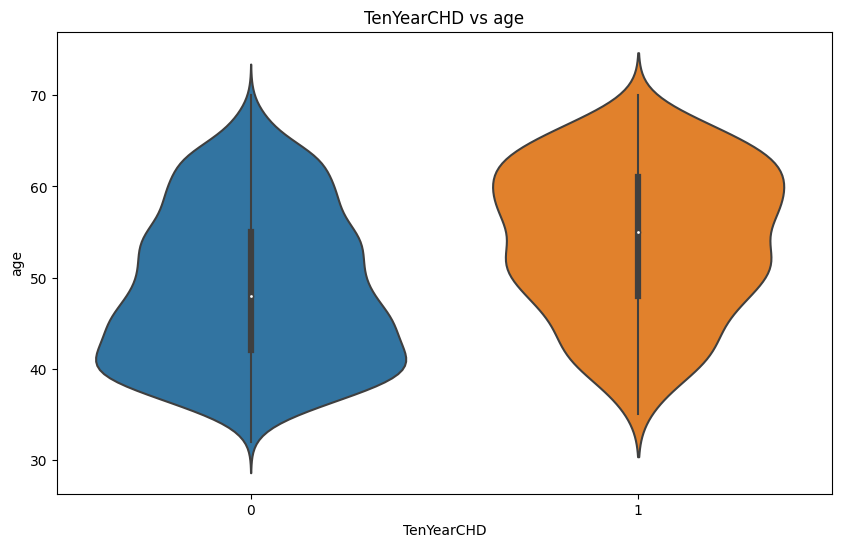

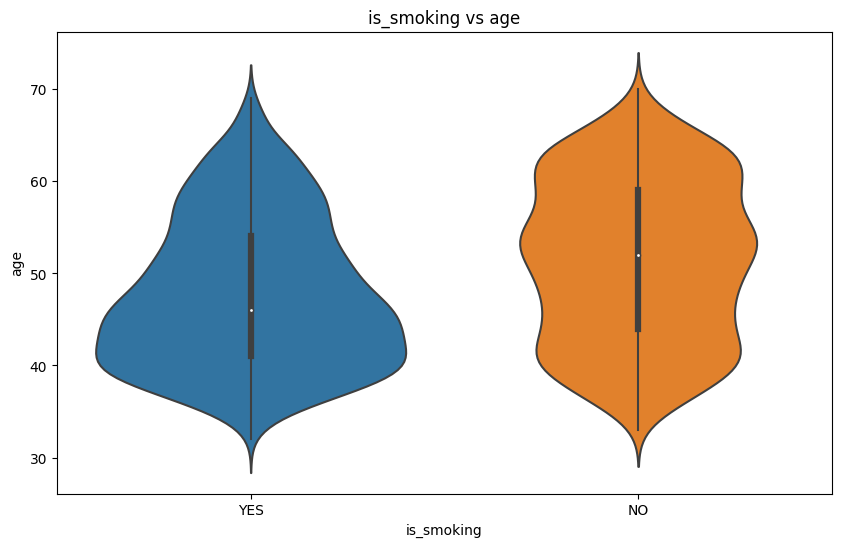

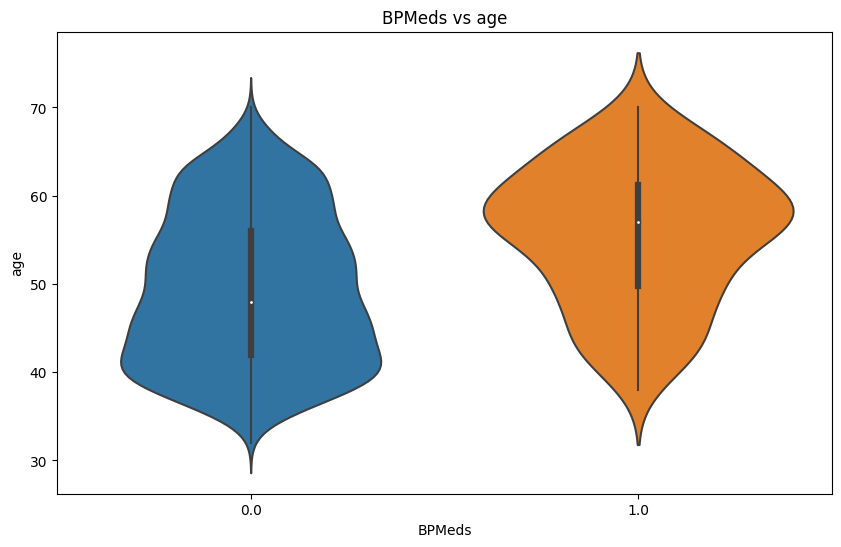

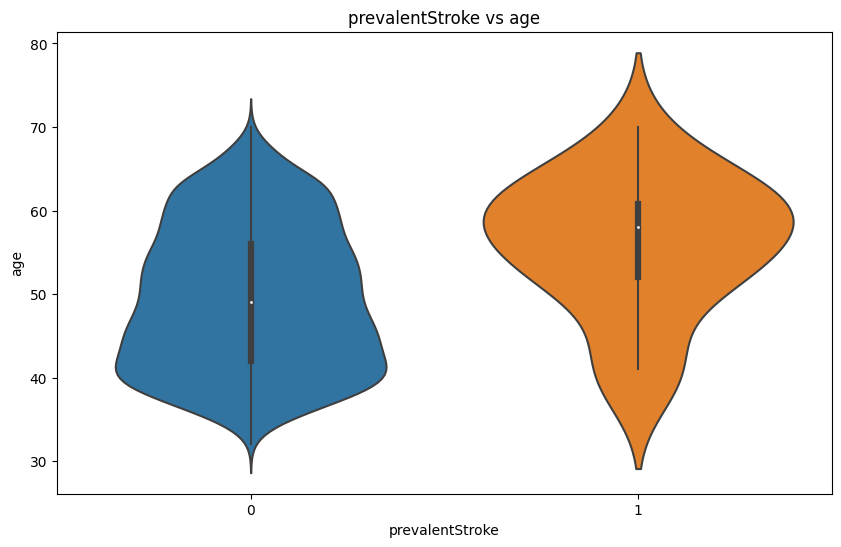

In [44]:
for i in ['education','prevalentHyp','diabetes','TenYearCHD','is_smoking','BPMeds','prevalentStroke']:
  plt.figure(figsize=(10,6))
  sns.violinplot(x=i,y='age',data=df)
  plt.title(f"{i} vs age")
  plt.show()

 1. Why did you pick the specific chart?

Answer Here.

 2. What is/are the insight(s) found from the chart?

Answer Here

 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### Chart - 4 - Categorical vs. Systolic BP

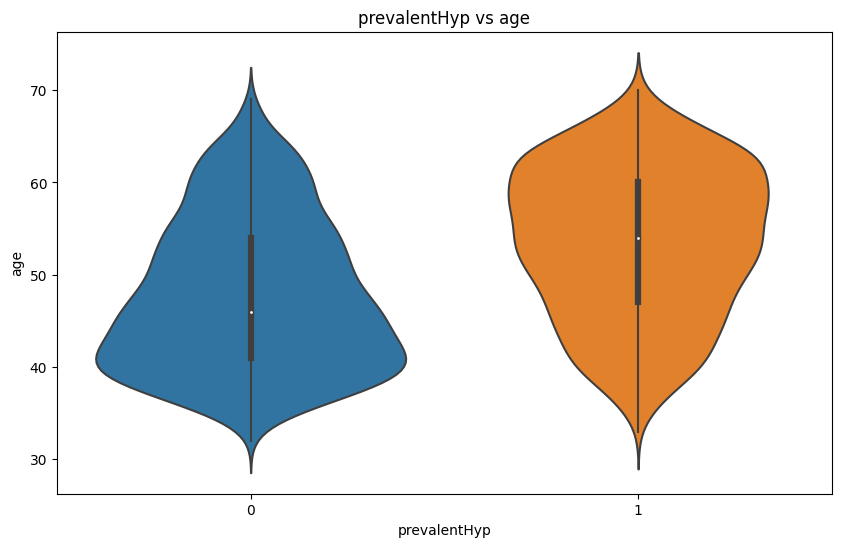

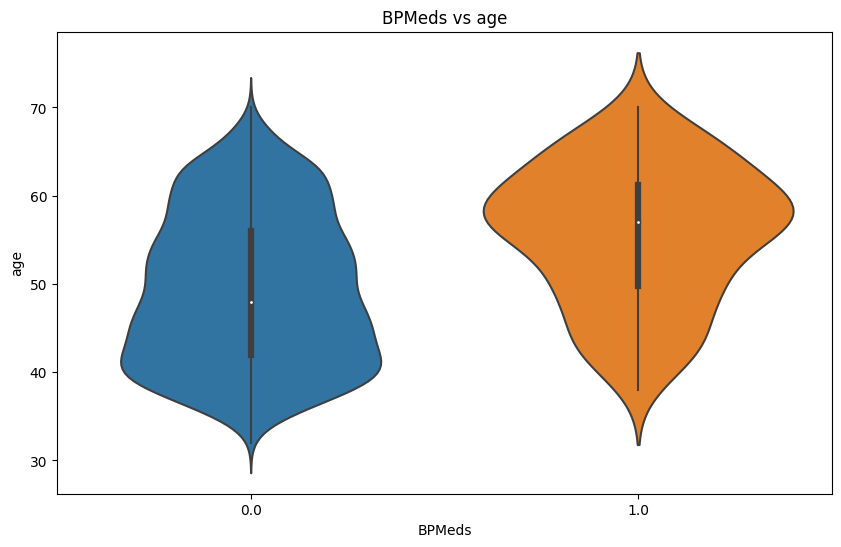

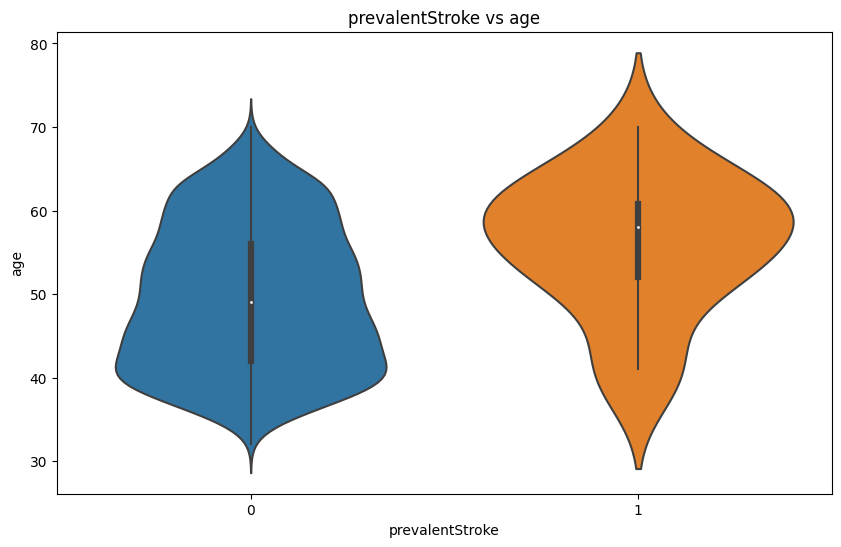

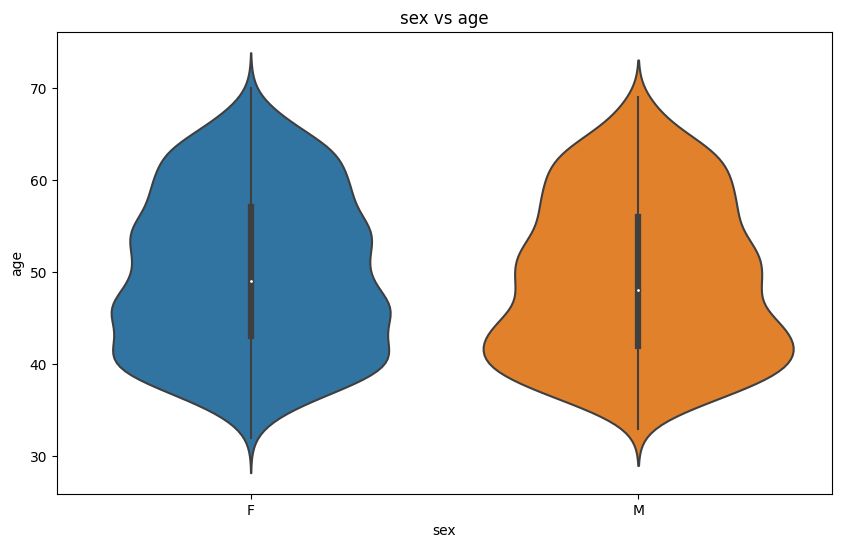

In [45]:
for i in ['prevalentHyp','BPMeds','prevalentStroke','sex']:
  plt.figure(figsize=(10,6))
  sns.violinplot(x=i,y='age',data=df)
  plt.title(f"{i} vs age")
  plt.show()

##### Chart - 5 - Categorical vs. cigsPerDay

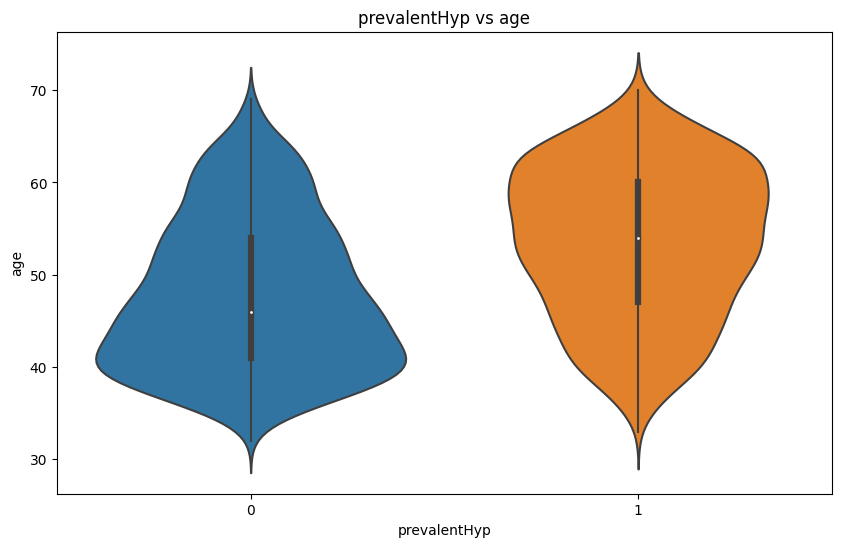

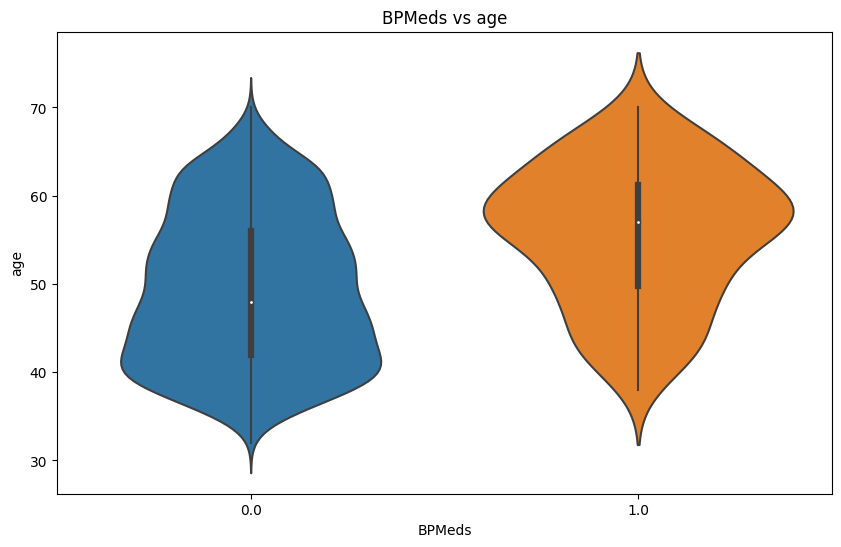

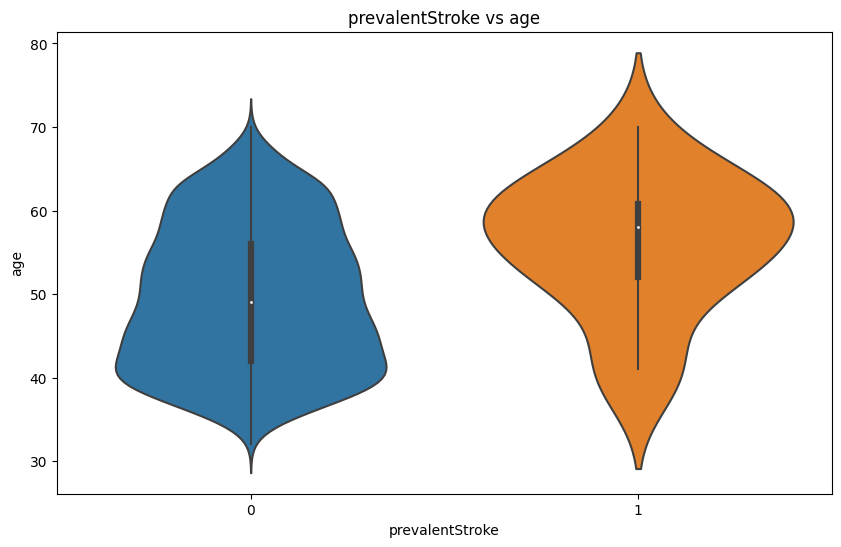

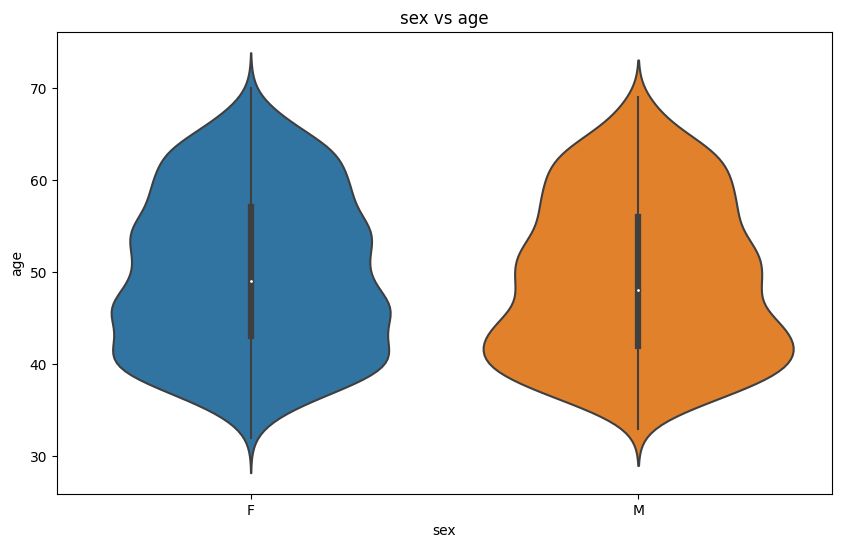

In [46]:
for i in ['prevalentHyp','BPMeds','prevalentStroke','sex']:
  plt.figure(figsize=(10,6))
  sns.violinplot(x=i,y='age',data=df)
  plt.title(f"{i} vs age")
  plt.show()

 'Numerical-Numerical'

##### Chart - 6 - Diastolic BP vs. Systolic BP

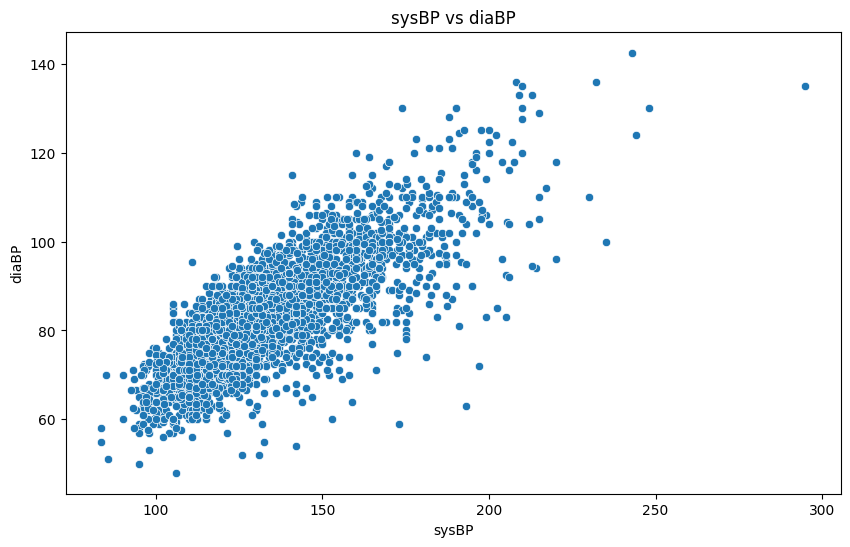

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sysBP',y='diaBP',data=df)
plt.title('sysBP vs diaBP')
plt.show()

#### Categorical-Categorical

#### Chart - 7

In [48]:
# Chart - 3 visualization code

In [49]:
print('numerical variables are: \n',num_vars,'\n','categorical variables are: \n',cat_vars)

numerical variables are: 
 ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] 
 categorical variables are: 
 ['education', 'prevalentHyp', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'diabetes', 'TenYearCHD']


In [50]:

# # Create grouped bar charts for all combinations of categorical-categorical variables
# for i in range(len(cat_vars)):
#     for j in range(len(cat_vars)):
#         if i != j:
#             # Create a contingency table (cross-tab) between two categorical variables
#             contingency_table = pd.crosstab(df[cat_vars[i]], df[cat_vars[j]], normalize='index') * 100  # Calculate percentages

#             # Create a grouped bar chart
#             ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
#             plt.title(f'{cat_vars[i]} vs. {cat_vars[j]} (Categorical - Categorical)')
#             plt.xlabel(cat_vars[i])
#             plt.ylabel('Percentage')
#             plt.legend(title=cat_vars[j], loc='upper right', bbox_to_anchor=(1.25, 1))
#             plt.xticks(rotation=0)

#             # Add percentage labels to each bar in the stacked chart
#             for patch in ax.patches:
#                 width, height = patch.get_width(), patch.get_height()
#                 x, y = patch.get_xy()
#                 ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

#             plt.show()

<Figure size 800x400 with 0 Axes>

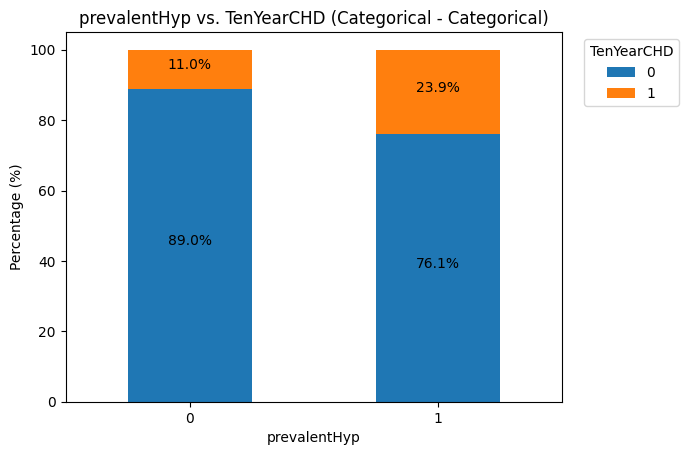

<Figure size 800x400 with 0 Axes>

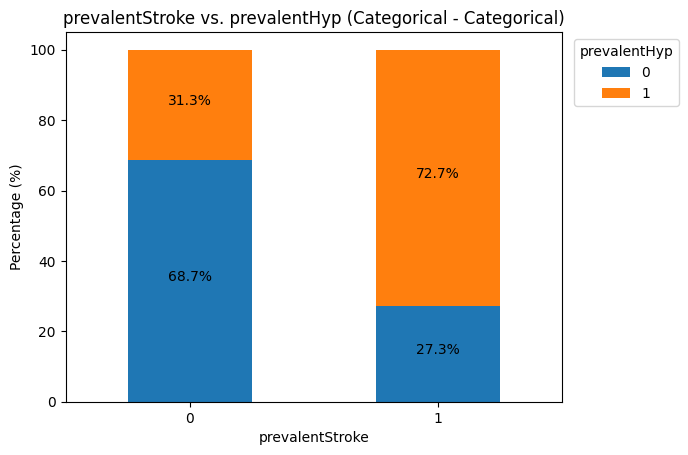

<Figure size 800x400 with 0 Axes>

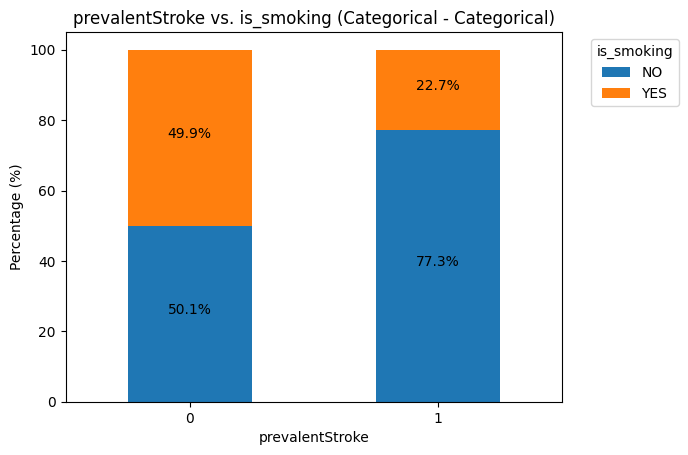

<Figure size 800x400 with 0 Axes>

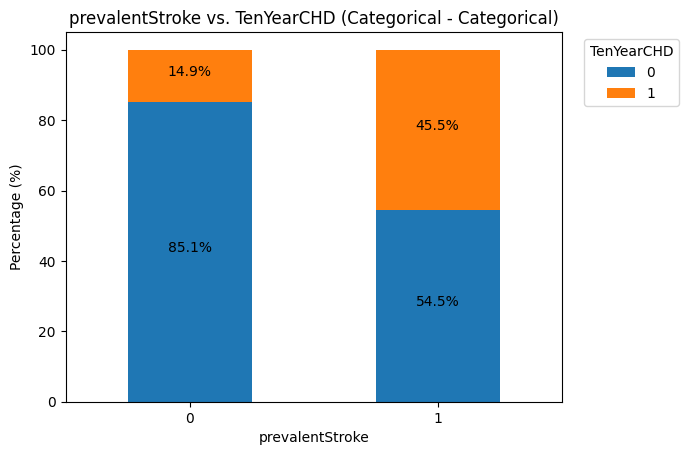

<Figure size 800x400 with 0 Axes>

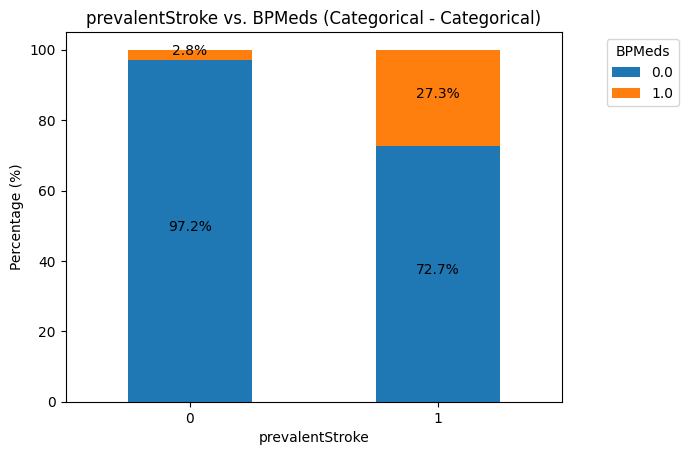

<Figure size 800x400 with 0 Axes>

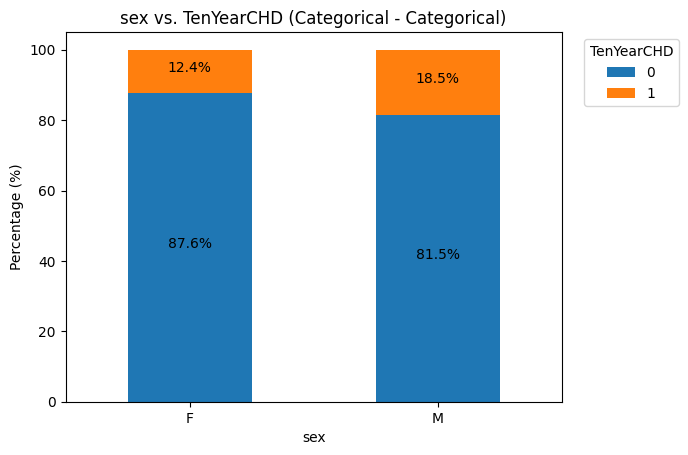

<Figure size 800x400 with 0 Axes>

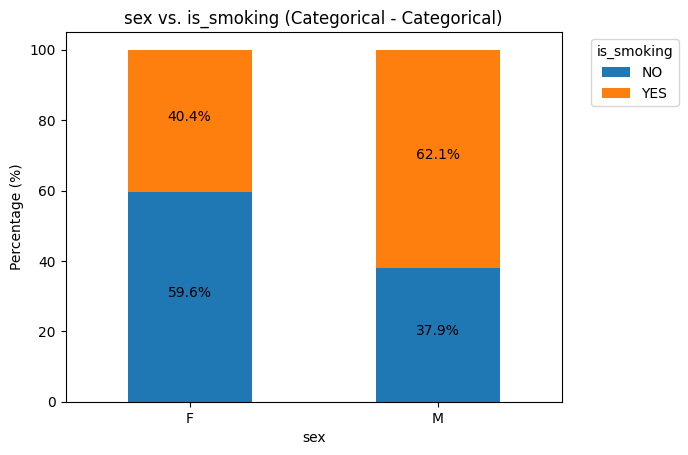

<Figure size 800x400 with 0 Axes>

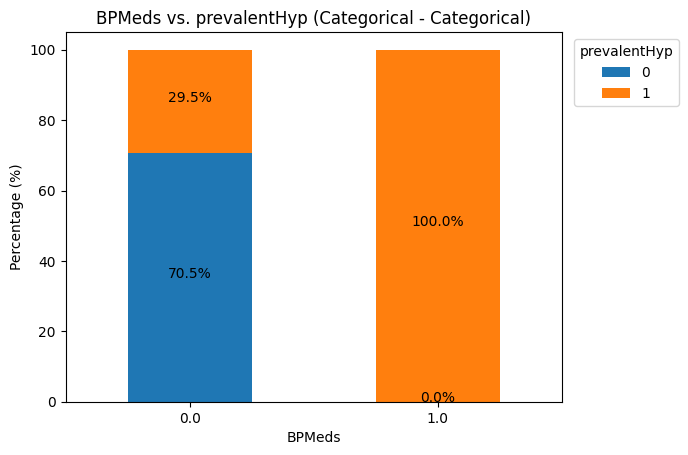

<Figure size 800x400 with 0 Axes>

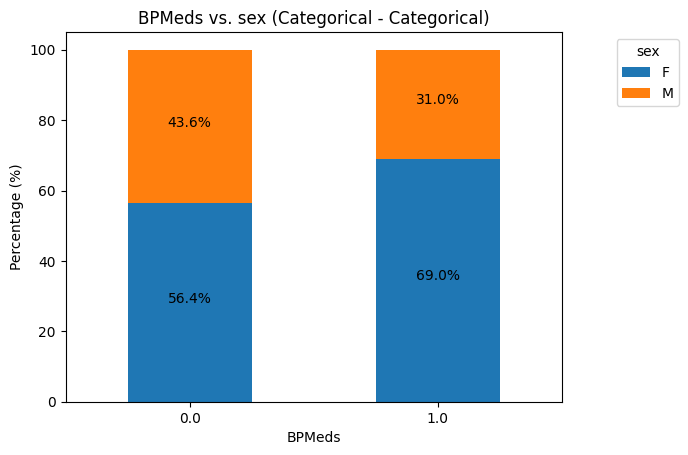

<Figure size 800x400 with 0 Axes>

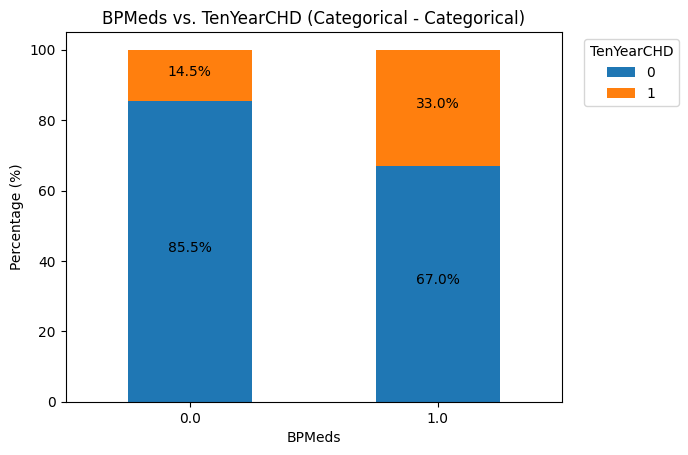

<Figure size 800x400 with 0 Axes>

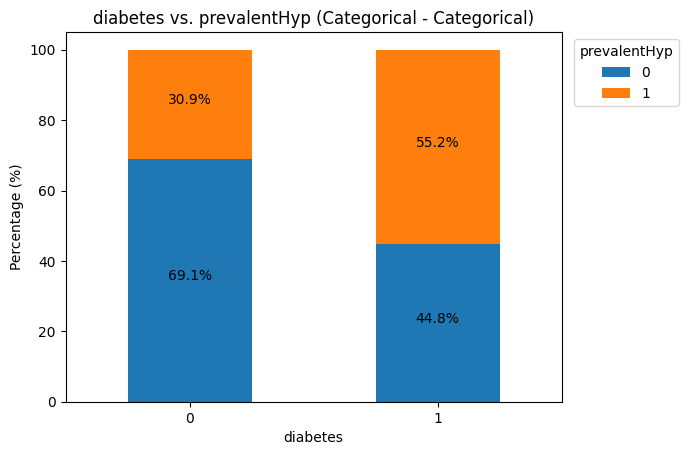

<Figure size 800x400 with 0 Axes>

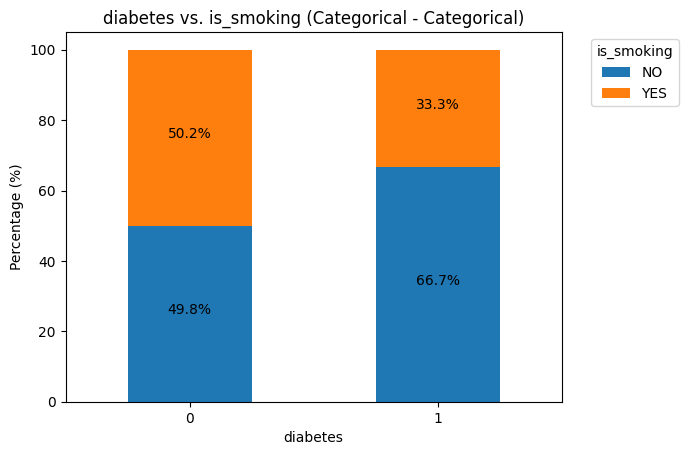

<Figure size 800x400 with 0 Axes>

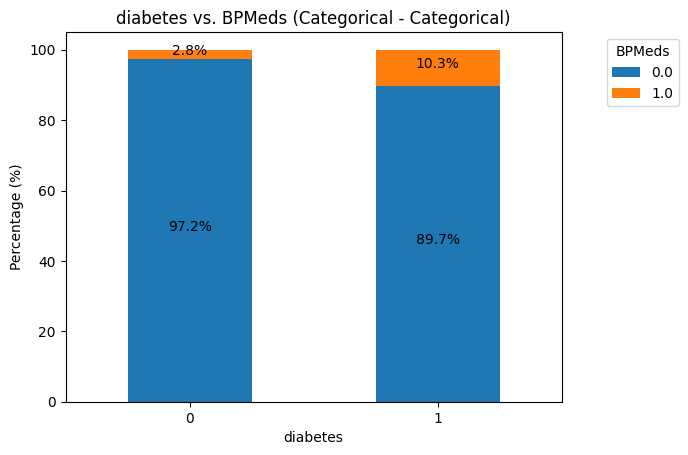

<Figure size 800x400 with 0 Axes>

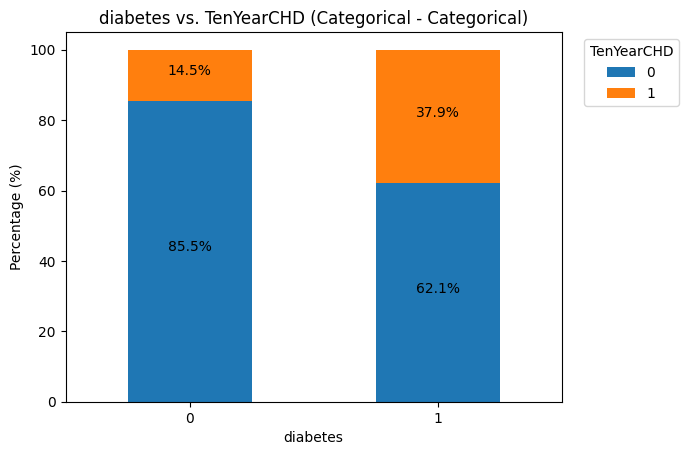

In [51]:
# Combinations for the first set
combinations = [
    ('prevalentHyp', 'TenYearCHD'),
    ('prevalentStroke', 'prevalentHyp'),
    ('prevalentStroke', 'is_smoking'),
    ('prevalentStroke', 'TenYearCHD'),
    ('prevalentStroke', 'BPMeds'),
    ('sex', 'TenYearCHD'),
    ('sex', 'is_smoking'),
    ('BPMeds', 'prevalentHyp'),
    ('BPMeds', 'sex'),
    ('BPMeds', 'TenYearCHD'),
    ('diabetes', 'prevalentHyp'),
    ('diabetes', 'is_smoking'),
    ('diabetes', 'BPMeds'),
    ('diabetes', 'TenYearCHD')
]

# Loop through combinations and create stacked bar charts
for combo in combinations:
    cat_var1, cat_var2 = combo

    # Create a contingency table (cross-tab) between two categorical variables
    contingency_table = pd.crosstab(df[cat_var1], df[cat_var2], normalize='index') * 100

    # Create a stacked bar chart with percentages
    plt.figure(figsize=(8, 4))
    ax = contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'{cat_var1} vs. {cat_var2} (Categorical - Categorical)')
    plt.xlabel(cat_var1)
    plt.ylabel('Percentage (%)')
    plt.legend(title=cat_var2, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.xticks(rotation=0)

    # Add percentages inside the stacked bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

    plt.show()

1. Why did you pick the specific chart?

Answer Here.

2. What is/are the insight(s) found from the chart?

Answer Here

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Multivariate Anlaysis (M)**

#### Chart - 8 - Age, BMI, and Ten-Year CHD Risk
(Numerical - Numerical - Categorical)

In [52]:
# Chart - 3 visualization code

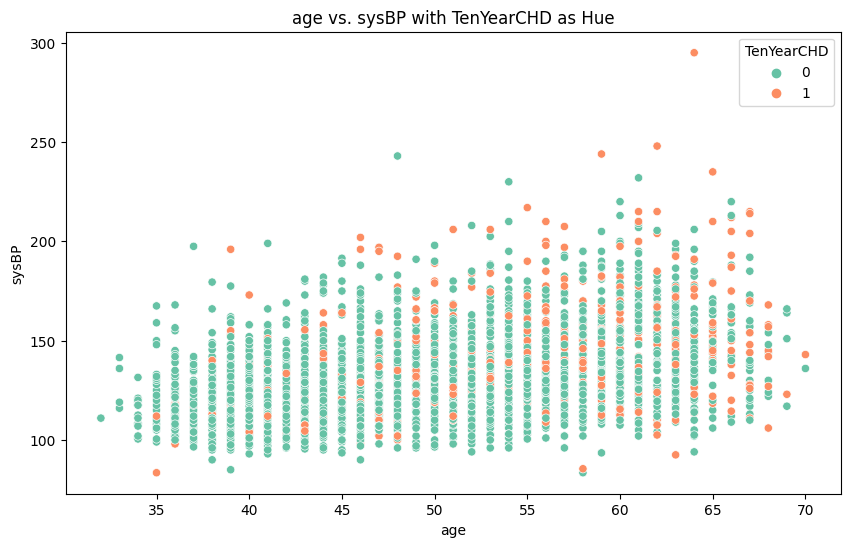

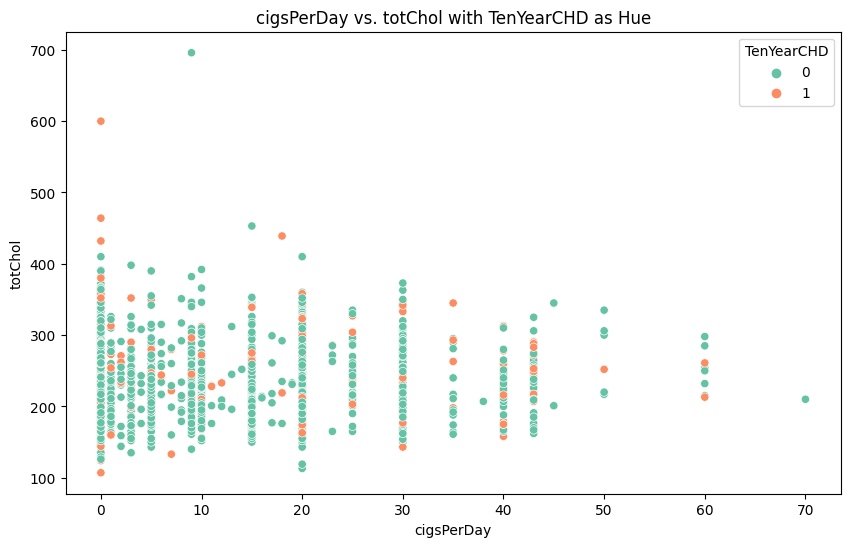

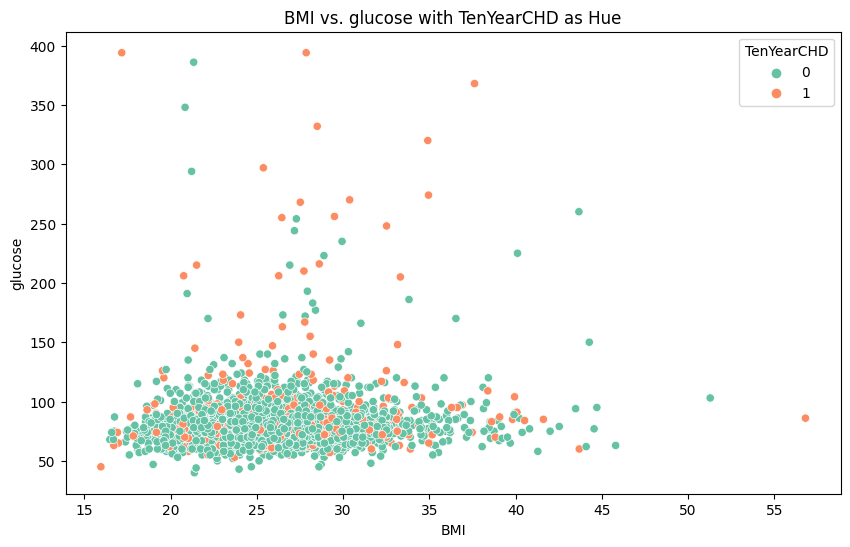

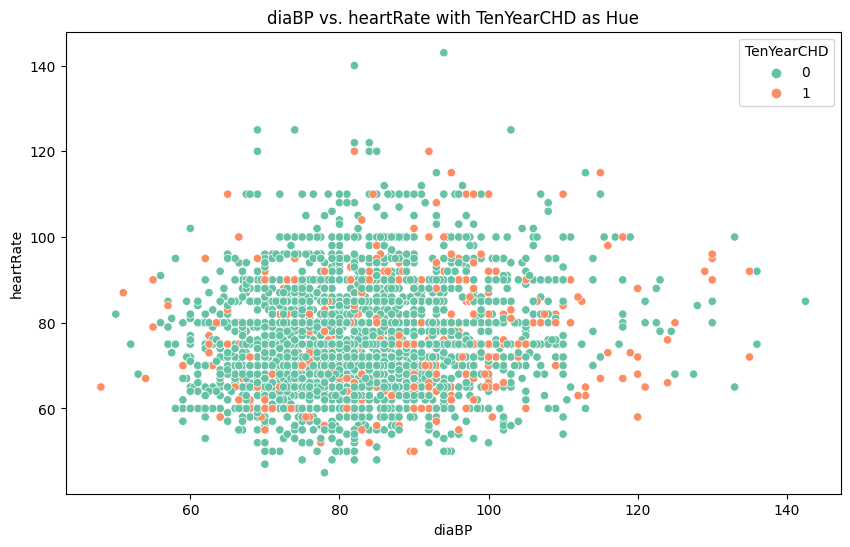

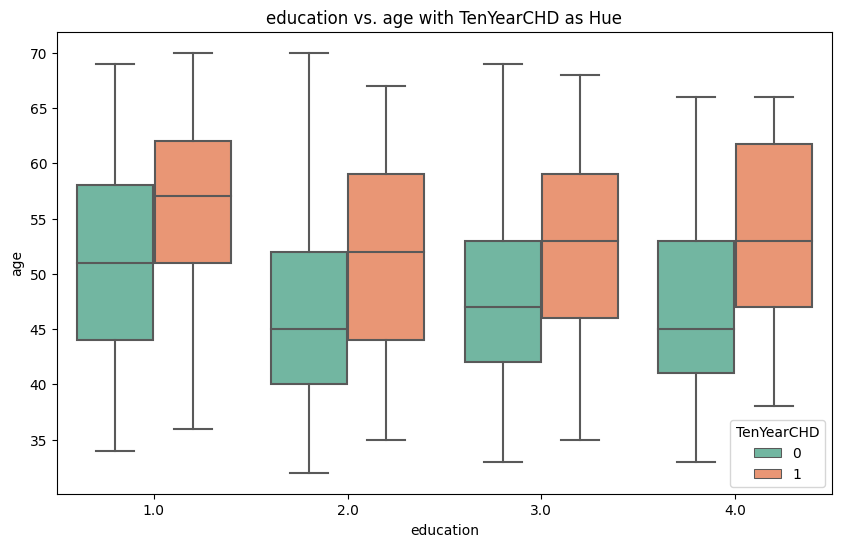

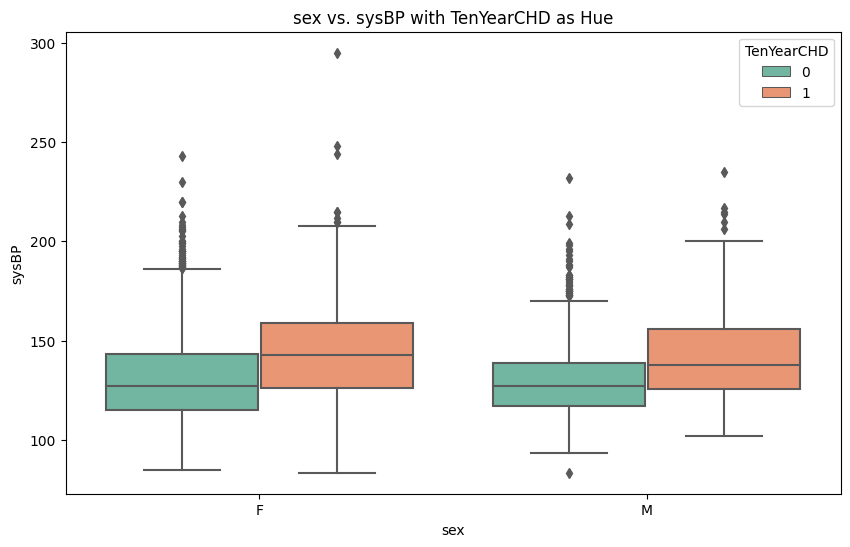

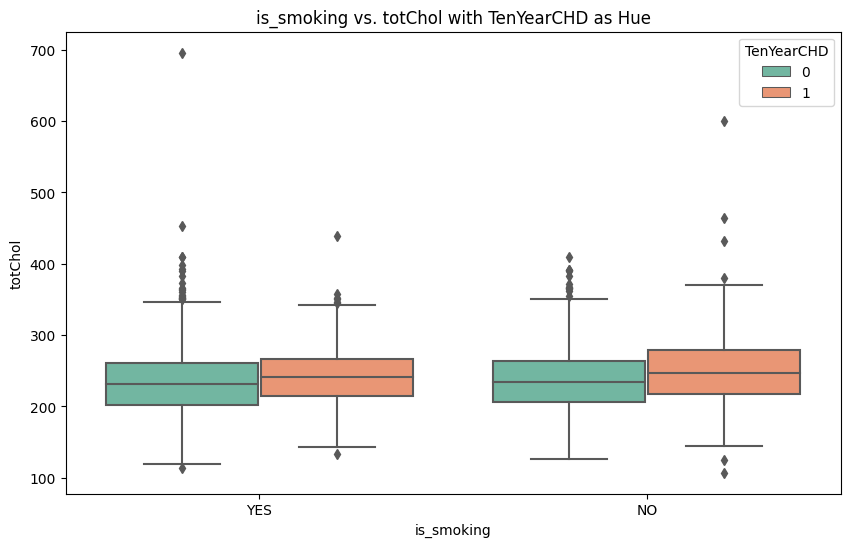

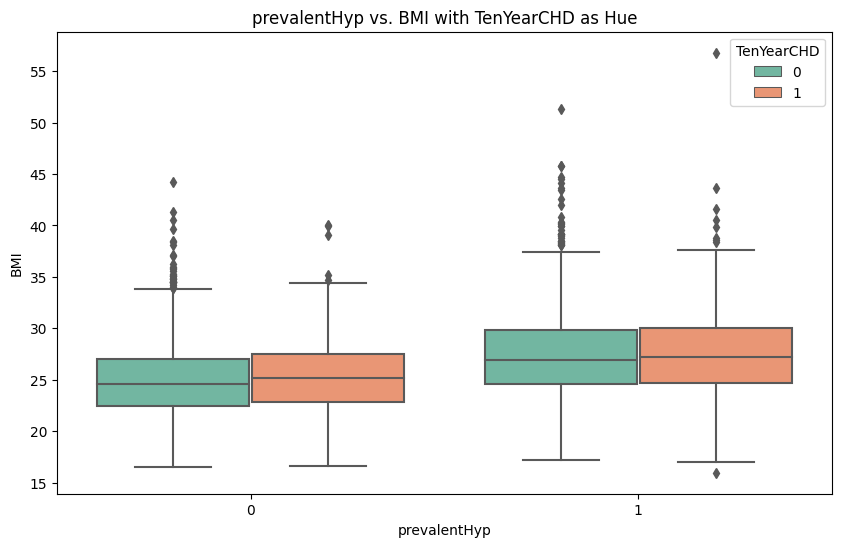

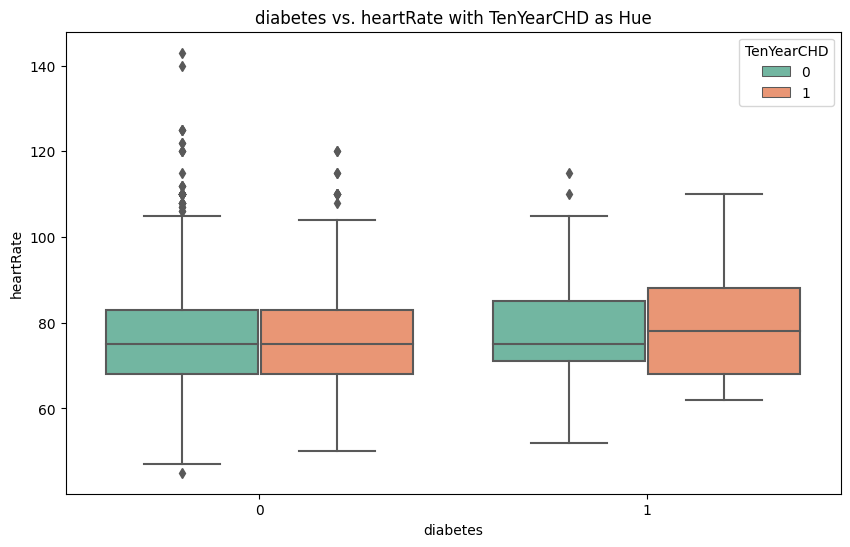

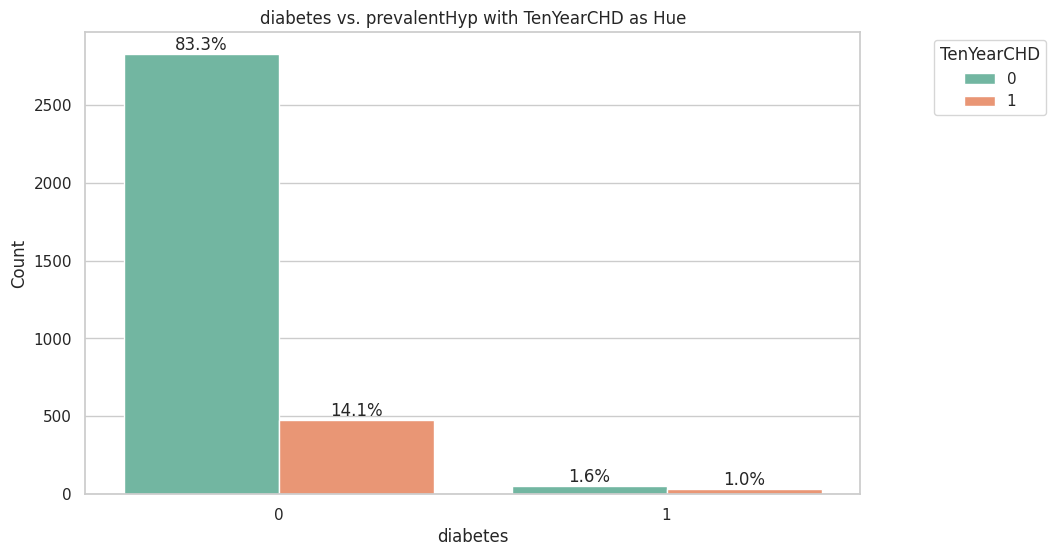

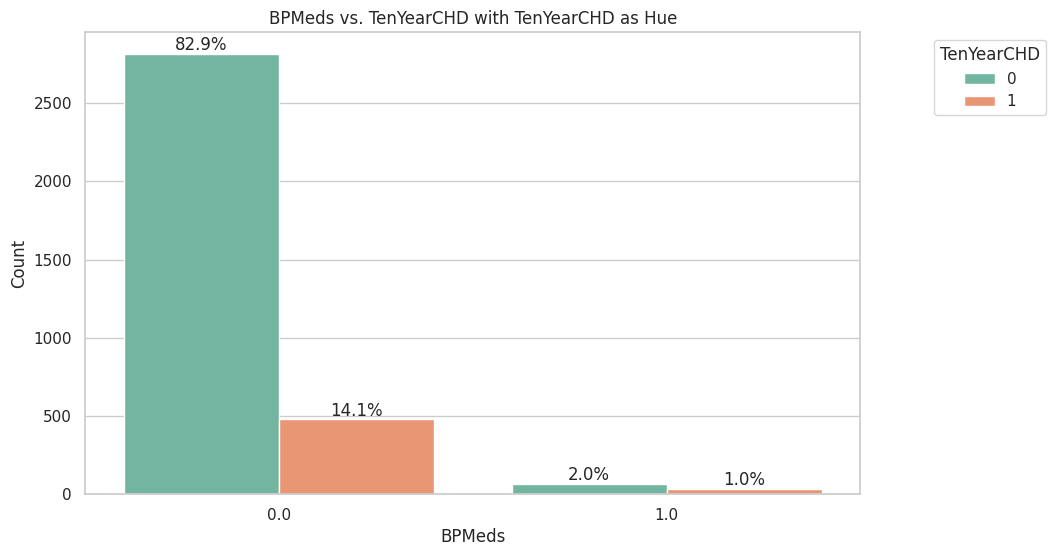

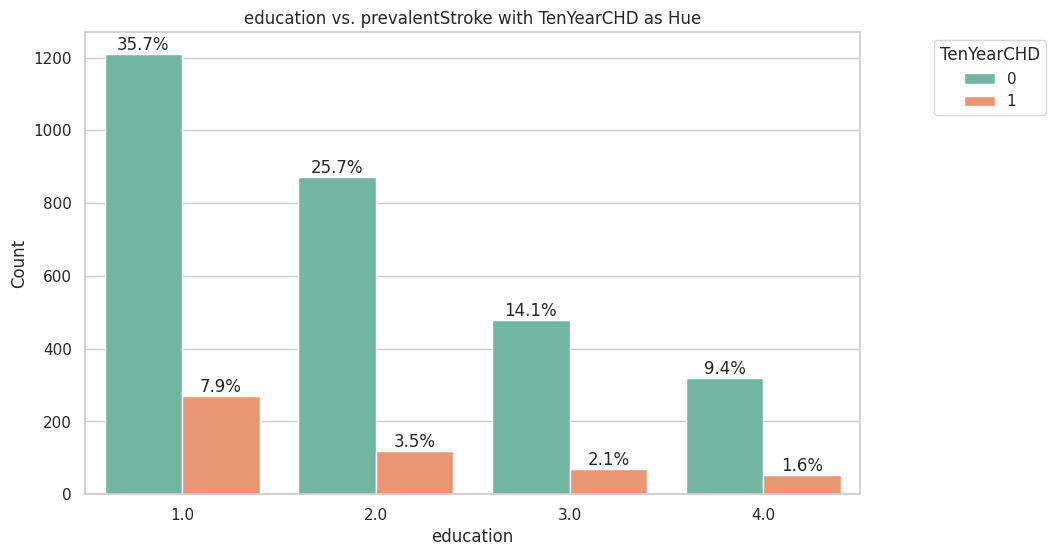

In [53]:
# List of combinations for Numerical-Numerical, Categorical-Numerical, and Categorical-Categorical
combinations = [
    ('age', 'sysBP'),  # Numerical-Numerical
    ('cigsPerDay', 'totChol'),  # Numerical-Numerical
    ('BMI', 'glucose'),  # Numerical-Numerical
    ('diaBP', 'heartRate'),  # Numerical-Numerical
    ('education', 'age'),  # Categorical-Numerical
    ('sex', 'sysBP'),  # Categorical-Numerical
    ('is_smoking', 'totChol'),  # Categorical-Numerical
    ('prevalentHyp', 'BMI'),  # Categorical-Numerical
    ('diabetes', 'heartRate'),  # Categorical-Numerical
    ('gender', 'is_smoking'),  # Categorical-Categorical
    ('diabetes', 'prevalentHyp'),  # Categorical-Categorical
    ('BPMeds', 'TenYearCHD'),  # Categorical-Categorical
    ('education', 'prevalentStroke')  # Categorical-Categorical
]

# Loop through combinations and create visualizations with TenYearCHD as hue
for combo in combinations:
    var1, var2 = combo

    # Check if the variables are numerical, categorical, or a combination
    if var1 in num_vars and var2 in num_vars:
        # Numerical-Numerical combination: Create scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=var1, y=var2, hue='TenYearCHD', palette='Set2')
        plt.title(f'{var1} vs. {var2} with TenYearCHD as Hue')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()
    elif var1 in cat_vars and var2 in num_vars:
        # Categorical-Numerical combination: Create box or violin plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=var1, y=var2, hue='TenYearCHD', palette='Set2')
        plt.title(f'{var1} vs. {var2} with TenYearCHD as Hue')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()
    elif var1 in cat_vars and var2 in cat_vars:
        # Categorical-Categorical combination: Create stacked bar chart
        combo_var = df.copy()
        combo_var['combo_var'] = combo_var['TenYearCHD'].astype(str) + '_' + combo_var[var2].astype(str)

        # Set the style
        sns.set(style="whitegrid")

        # Create a stacked bar chart with percentages
        plt.figure(figsize=(10, 6))
        sns.countplot(data=combo_var, x=var1, hue='TenYearCHD', palette='Set2')
        plt.title(f'{var1} vs. {var2} with TenYearCHD as Hue')
        plt.xlabel(var1)
        plt.ylabel('Count')
        plt.legend(title='TenYearCHD', loc='upper right', bbox_to_anchor=(1.25, 1))

        # Show percentages on top of the bars
        total = len(combo_var)
        for p in plt.gca().patches:
            height = p.get_height()
            plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                               ha='center', va='bottom')

        plt.show()

In [54]:
print('numerical variables are: \n',num_vars,'\n','categorical variables are: \n',cat_vars)

numerical variables are: 
 ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] 
 categorical variables are: 
 ['education', 'prevalentHyp', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'diabetes', 'TenYearCHD']


In [55]:
# for i in num_vars:
#   sns.catplot(data=df,x='TenYearCHD',y=i,kind='violin',split=True)
#   # sns.catplot(data=df,x='TenYearCHD',y=i,kind='violin',hue='sex',split=True)
#   plt.title('TenYearCHD '+'vs '+i)
#   plt.show()

1. Why did you pick the specific chart?

Answer Here.

2. What is/are the insight(s) found from the chart?

Answer Here

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Gender, Smoking Status, and Ten-Year CHD Risk
(Categorical - Categorical - Categorical)

In [56]:
# Chart - 4 visualization code

1. Why did you pick the specific chart?

Answer Here.

2. What is/are the insight(s) found from the chart?

Answer Here

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Age, Total Cholesterol, and Systolic Blood Pressure
(Numerical - Numerical - Numerical)

In [57]:
# Chart - 5 visualization code

1. Why did you pick the specific chart?

Answer Here.

2. What is/are the insight(s) found from the chart?

Answer Here

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Others

#### Chart - 11 - Numerical Variables Distribution and TenYearCHD - KDE Distribution

In [58]:
# Chart - 5 visualization code

1. Why did you pick the specific chart?

Answer Here.

2. What is/are the insight(s) found from the chart?

Answer Here

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Categorical Variables and TenYearCHD - Stacked Bar Plot

In [59]:
# Chart - 6 visualization code

<Figure size 1000x500 with 0 Axes>

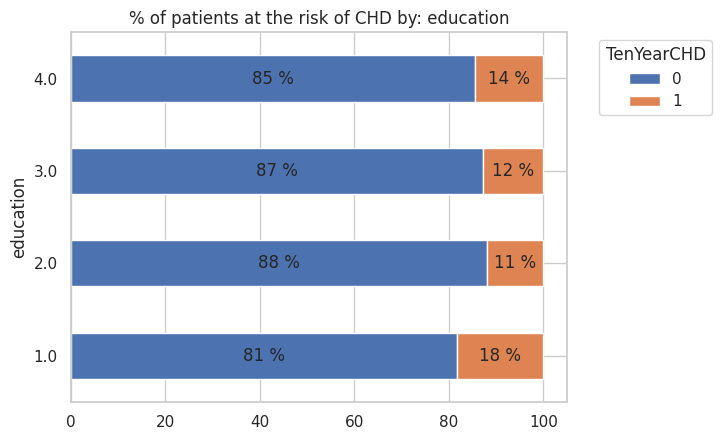

<Figure size 1000x500 with 0 Axes>

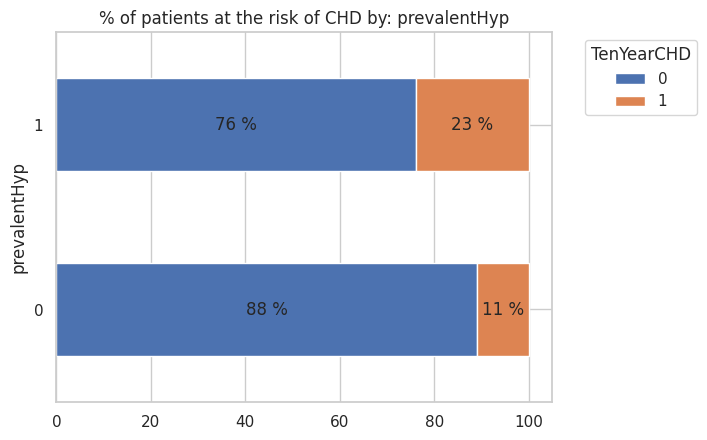

<Figure size 1000x500 with 0 Axes>

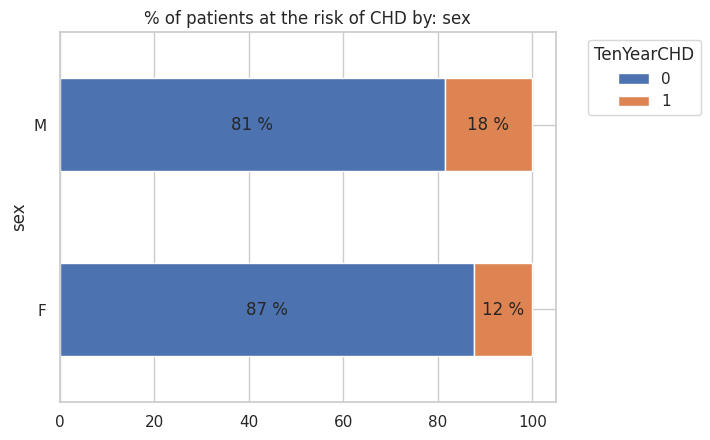

<Figure size 1000x500 with 0 Axes>

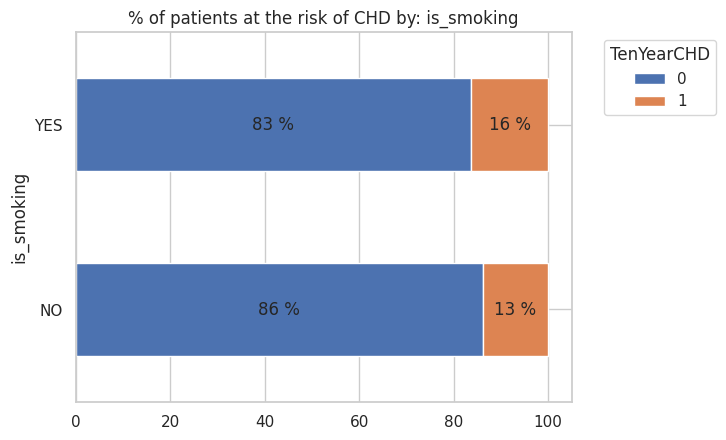

<Figure size 1000x500 with 0 Axes>

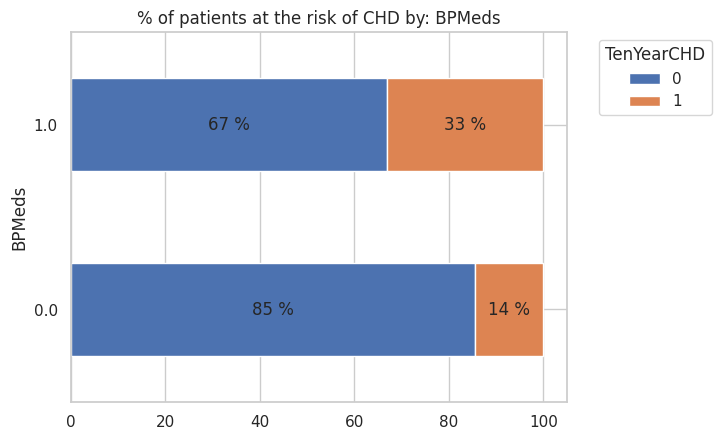

<Figure size 1000x500 with 0 Axes>

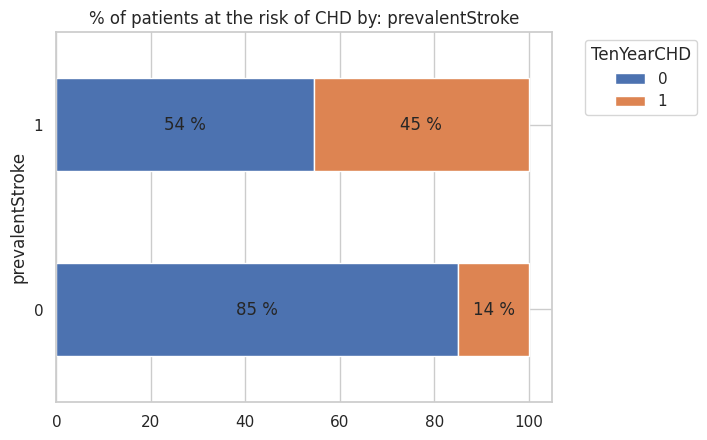

<Figure size 1000x500 with 0 Axes>

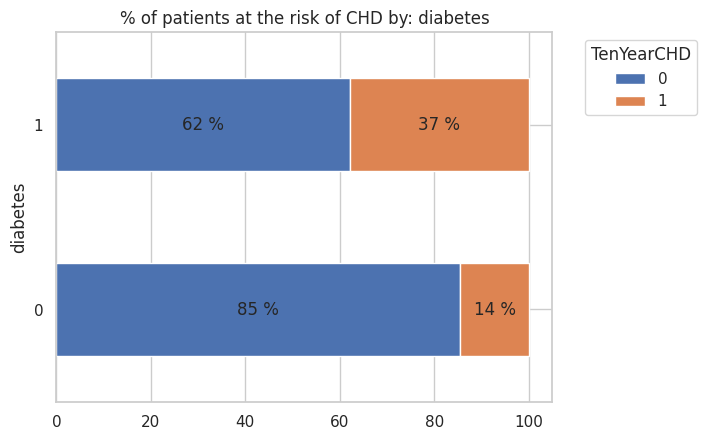

<Figure size 1000x500 with 0 Axes>

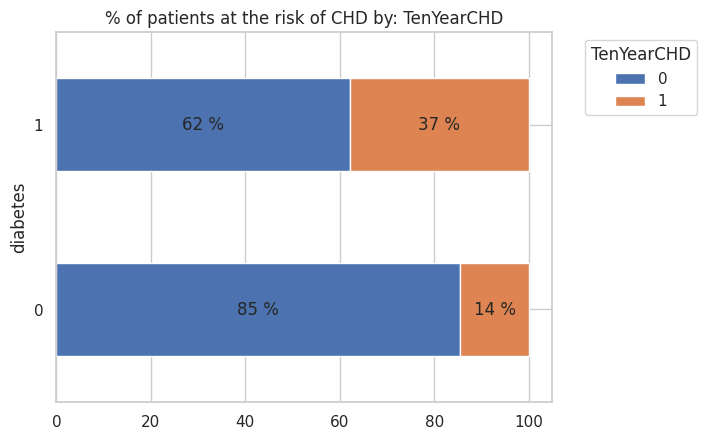

In [60]:
for i in cat_vars:
    if i=='TenYearCHD':
      pass
    else:
      x_var, y_var = i, 'TenYearCHD'
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

1. Why did you pick the specific chart?

Answer Here.

2. What is/are the insight(s) found from the chart?

Answer Here

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Categorical Variable and TenYearCHD - Bar Plot

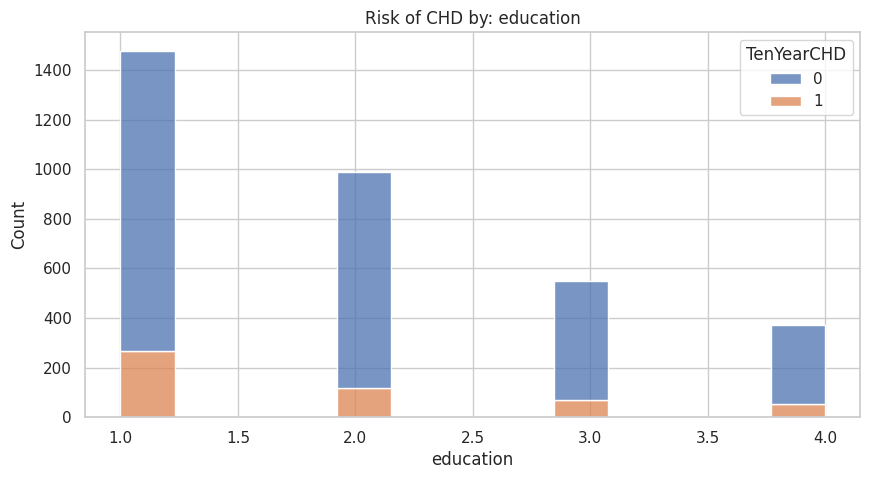

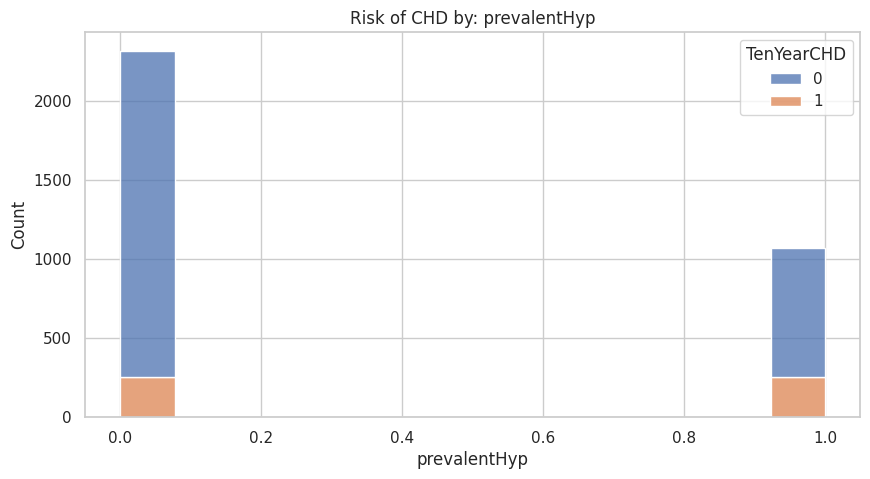

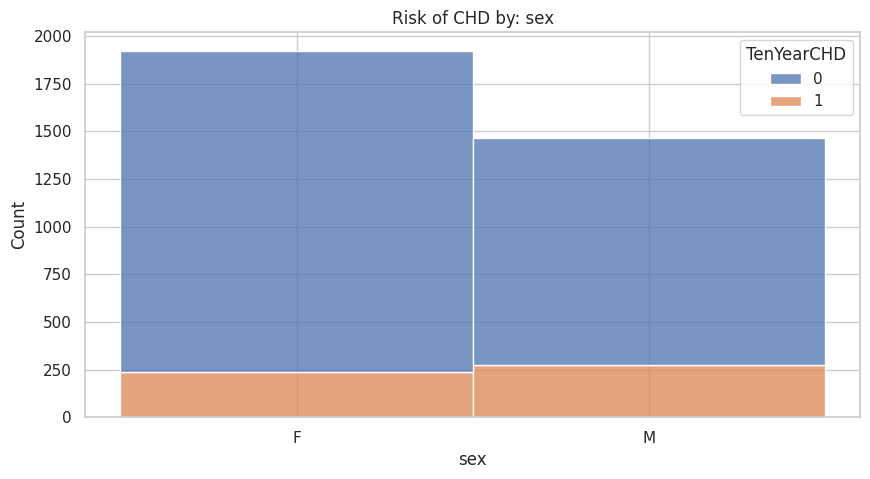

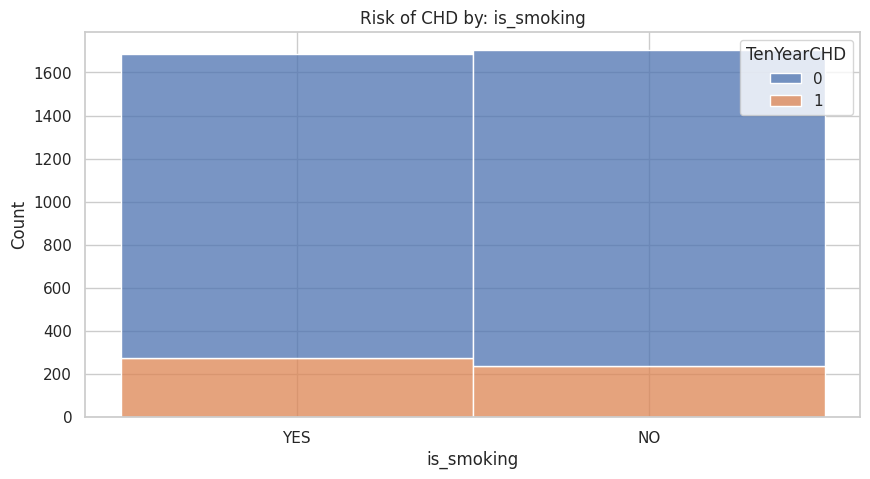

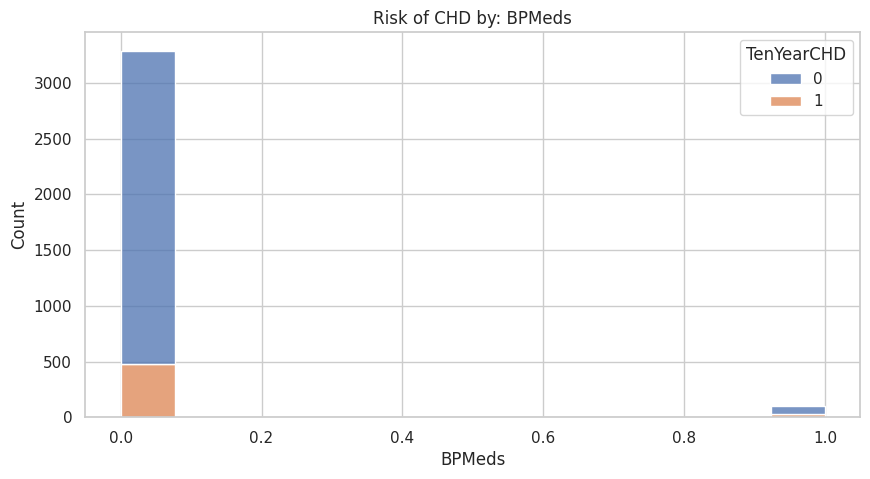

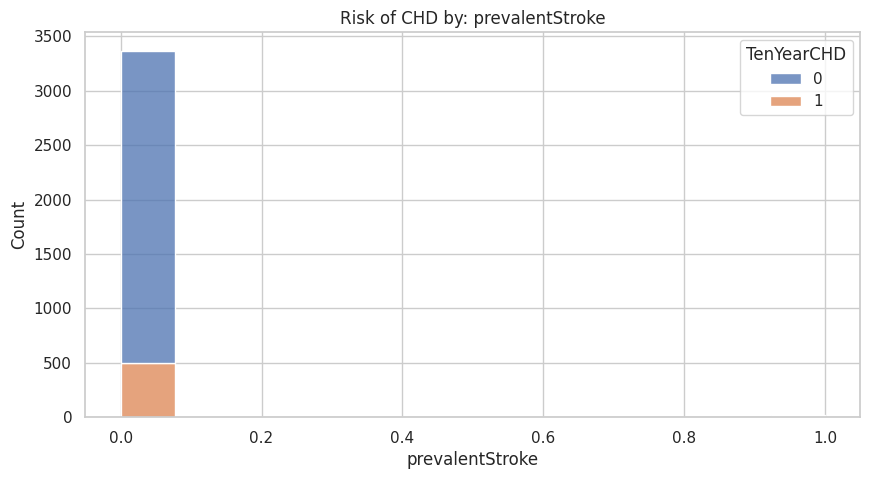

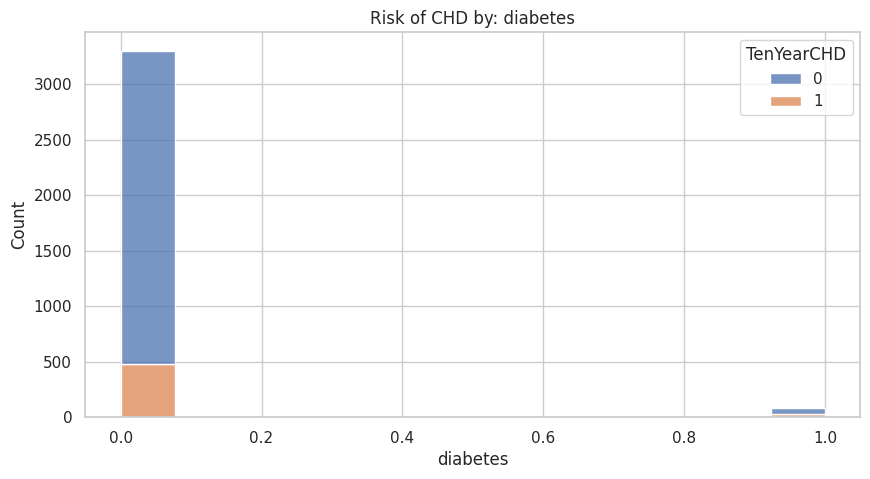

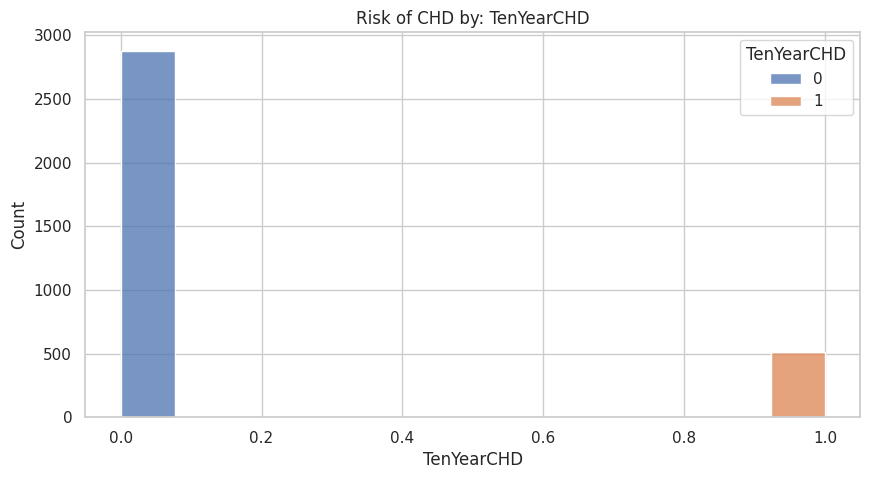

In [61]:
for i in cat_vars:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue='TenYearCHD', data=df, stat="count", multiple="stack")
  plt.title('Risk of CHD by: '+i)
  # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
  plt.show()

1. Why did you pick the specific chart?

Answer Here.

2. What is/are the insight(s) found from the chart?

Answer Here

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [62]:
# Correlation Heatmap visualization code

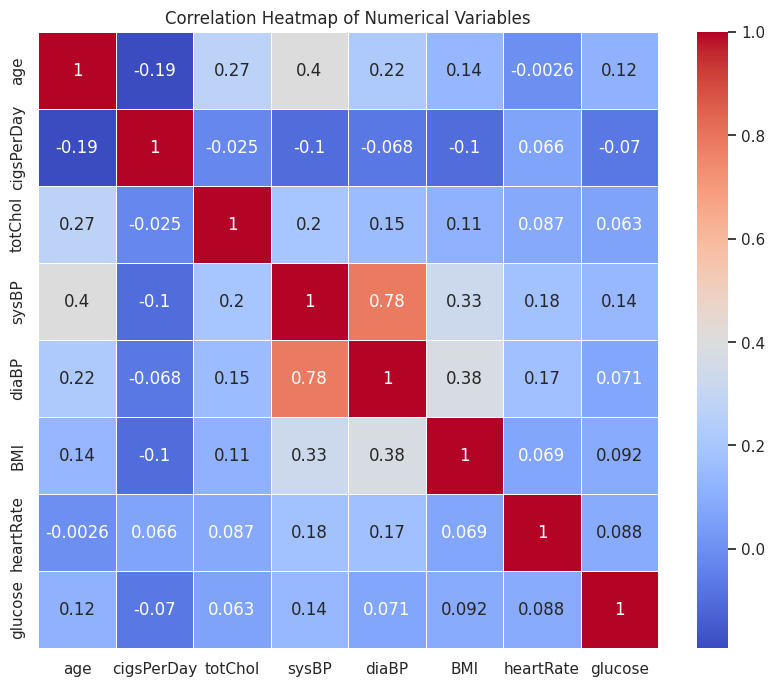

In [63]:
# Calculate the correlation matrix
correlation_matrix = df[num_vars].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

1. Why did you pick the specific chart?

Answer Here.

2. What is/are the insight(s) found from the chart?

Answer Here

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15 - Pair Plot

In [64]:
# Pair Plot visualization code

In [65]:
# sns.pairplot(df,hue='sex')

In [66]:
# sns.pairplot(df,hue='TenYearCHD')

1. Why did you pick the specific chart?

Answer Here.

2. What is/are the insight(s) found from the chart?

Answer Here

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

##### is_smoking and sex column - encoding binary columns

In [67]:
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)
df['sex'] = np.where(df['sex'] == 'M',1,0)

### 1. Handling Missing Values

In [68]:
# Handling Missing Values & Missing Value Imputation

In [69]:
print(f'The unique value for :\n')
for i in df.columns:
  print(f'{i} :',df[i].nunique())

The unique value for :

age : 39
education : 4
sex : 2
is_smoking : 2
cigsPerDay : 32
BPMeds : 2
prevalentStroke : 2
prevalentHyp : 2
diabetes : 2
totChol : 240
sysBP : 226
diaBP : 142
BMI : 1259
heartRate : 68
glucose : 132
TenYearCHD : 2


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [70]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
    # ('add_variables', NewVariablesAdder()),
    # ('std_scaler', StandardScaler())
])

num_transformed = num_pipeline.fit_transform(df[num_vars])
num_transformed = pd.DataFrame(num_transformed)
num_transformed.columns = num_vars

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ('add_variables', NewVariablesAdder()),
    ('robust_scaler', RobustScaler())
])

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
data_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, num_vars),
    ('categorical', OneHotEncoder(), cat_vars),

])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [74]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [75]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

In [76]:
df1 = df_org.copy()

In [77]:
features = df1.loc[:,['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'diabetes', 'glucose', 'age', 'cigsPerDay', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']]
labels = pd.DataFrame(df1.loc[:,'TenYearCHD'])
print(features.columns,'\n',labels.columns)
print(features.shape,labels.shape)
print(df1.shape)

Index(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'diabetes', 'glucose', 'age', 'cigsPerDay', 'prevalentHyp', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate'],
      dtype='object') 
 Index(['TenYearCHD'], dtype='object')
(3390, 15) (3390, 1)
(3390, 17)


In [78]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   education        3303 non-null   float64
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   BPMeds           3346 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   diabetes         3390 non-null   int64  
 6   glucose          3086 non-null   float64
 7   age              3390 non-null   int64  
 8   cigsPerDay       3368 non-null   float64
 9   prevalentHyp     3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 397.4+ KB


In [79]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TenYearCHD  3390 non-null   int64
dtypes: int64(1)
memory usage: 26.6 KB


In [80]:
features.isna().sum()

education           87
sex                  0
is_smoking           0
BPMeds              44
prevalentStroke      0
diabetes             0
glucose            304
age                  0
cigsPerDay          22
prevalentHyp         0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
dtype: int64

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [81]:
# Transform Your data

### 6. Data Scaling

In [82]:
df.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [83]:
# Scaling your data

In [84]:
df.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [85]:
features_processed = data_pipeline.fit_transform(df)
df_transformed = pd.DataFrame(features_processed)

In [86]:
df_transformed.columns = data_pipeline.get_feature_names_out(input_features=df.columns)

In [87]:
df_transformed.head(5)

,numerical__age,numerical__cigsPerDay,numerical__totChol,numerical__sysBP,numerical__diaBP,numerical__BMI,numerical__heartRate,numerical__glucose,categorical__education_1.0,categorical__education_2.0,...,categorical__is_smoking_0,categorical__is_smoking_1,categorical__BPMeds_0.0,categorical__BPMeds_1.0,categorical__prevalentStroke_0,categorical__prevalentStroke_1,categorical__diabetes_0,categorical__diabetes_1,categorical__TenYearCHD_0,categorical__TenYearCHD_1
0,1.071429,0.15,-0.224138,0.722222,0.193548,0.000000,1.000000,0.153846,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.928571,0.00,-0.379310,1.462963,1.032258,0.883744,-0.200000,-0.230769,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.214286,0.50,0.275862,-0.462963,-0.709677,-1.012582,0.866667,1.230769,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.071429,1.00,-0.017241,1.092593,0.387097,0.579768,-0.466667,1.230769,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.071429,1.50,0.120690,0.296296,0.193548,0.209361,-0.333333,-0.076923,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [88]:
df_transformed['TenYearCHD'] = labels
df_transformed.drop(['categorical__TenYearCHD_0','categorical__TenYearCHD_1'],axis=1,inplace=True)

In [89]:
df_transformed.head(5)

,numerical__age,numerical__cigsPerDay,numerical__totChol,numerical__sysBP,numerical__diaBP,numerical__BMI,numerical__heartRate,numerical__glucose,categorical__education_1.0,categorical__education_2.0,...,categorical__sex_1,categorical__is_smoking_0,categorical__is_smoking_1,categorical__BPMeds_0.0,categorical__BPMeds_1.0,categorical__prevalentStroke_0,categorical__prevalentStroke_1,categorical__diabetes_0,categorical__diabetes_1,TenYearCHD
0,1.071429,0.15,-0.224138,0.722222,0.193548,0.000000,1.000000,0.153846,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,-0.928571,0.00,-0.379310,1.462963,1.032258,0.883744,-0.200000,-0.230769,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,-0.214286,0.50,0.275862,-0.462963,-0.709677,-1.012582,0.866667,1.230769,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,0.071429,1.00,-0.017241,1.092593,0.387097,0.579768,-0.466667,1.230769,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,1.071429,1.50,0.120690,0.296296,0.193548,0.209361,-0.333333,-0.076923,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [90]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [91]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [92]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [93]:
df_transformed.isnull().sum().sum()

0

In [94]:
df_transformed.dropna(inplace=True)

In [95]:
df_transformed.iloc[:,:-1]

,numerical__age,numerical__cigsPerDay,numerical__totChol,numerical__sysBP,numerical__diaBP,numerical__BMI,numerical__heartRate,numerical__glucose,categorical__education_1.0,categorical__education_2.0,...,categorical__sex_0,categorical__sex_1,categorical__is_smoking_0,categorical__is_smoking_1,categorical__BPMeds_0.0,categorical__BPMeds_1.0,categorical__prevalentStroke_0,categorical__prevalentStroke_1,categorical__diabetes_0,categorical__diabetes_1
0,1.071429,0.15,-0.224138,0.722222,0.193548,0.000000,1.000000,0.153846,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.928571,0.00,-0.379310,1.462963,1.032258,0.883744,-0.200000,-0.230769,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.214286,0.50,0.275862,-0.462963,-0.709677,-1.012582,0.866667,1.230769,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.071429,1.00,-0.017241,1.092593,0.387097,0.579768,-0.466667,1.230769,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.071429,1.50,0.120690,0.296296,0.193548,0.209361,-0.333333,-0.076923,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.785714,0.00,0.465517,-0.185185,-0.193548,0.785103,-0.333333,1.923077,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3386,-0.214286,0.00,-0.603448,-0.981481,-1.677419,-0.688475,0.333333,0.461538,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3387,-0.357143,0.15,2.034483,1.314815,2.387097,0.712632,-0.133333,-0.461538,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3388,0.785714,0.00,-0.741379,1.425926,1.483871,-0.477101,0.333333,0.538462,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [96]:
df_transformed.iloc[:,-1]

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [97]:
# Handle missing values with an imputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
df_transformed = pd.DataFrame(imputer.fit_transform(df_transformed), columns=df_transformed.columns)

In [98]:
X = df_transformed.iloc[:,:-1]

In [99]:
X.head(5)

,numerical__age,numerical__cigsPerDay,numerical__totChol,numerical__sysBP,numerical__diaBP,numerical__BMI,numerical__heartRate,numerical__glucose,categorical__education_1.0,categorical__education_2.0,...,categorical__sex_0,categorical__sex_1,categorical__is_smoking_0,categorical__is_smoking_1,categorical__BPMeds_0.0,categorical__BPMeds_1.0,categorical__prevalentStroke_0,categorical__prevalentStroke_1,categorical__diabetes_0,categorical__diabetes_1
0,1.071429,0.15,-0.224138,0.722222,0.193548,0.000000,1.000000,0.153846,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.928571,0.00,-0.379310,1.462963,1.032258,0.883744,-0.200000,-0.230769,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.214286,0.50,0.275862,-0.462963,-0.709677,-1.012582,0.866667,1.230769,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.071429,1.00,-0.017241,1.092593,0.387097,0.579768,-0.466667,1.230769,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.071429,1.50,0.120690,0.296296,0.193548,0.209361,-0.333333,-0.076923,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [100]:
y = df_transformed.iloc[:,-1].values.ravel()

In [101]:
y=pd.Series(y)

In [102]:
y.head(5)

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
dtype: float64

In [103]:
# y.info()

In [104]:
# y.isnull().sum()

In [105]:
# y = y.loc[:,0].ravel()

In [106]:
for train, test in split.split(X,y):
    X_train = X.iloc[train]
    y_train = y.iloc[train].to_numpy()
    X_test = X.iloc[test]
    y_test = y.iloc[test].to_numpy()

In [107]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2712, 24) (678, 24) (2712,) (678,)


In [108]:
# y.loc[:,0]

In [109]:
# print(X_train.isna().sum(),X_test.isna().sum(),y_train.isna().sum(),y_test.isna().sum())

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [110]:
# Handling Imbalanced Dataset (If needed)

In [111]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Apply BorderlineSMOTE to the training data
smote_variant = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote_variant.fit_resample(X_train, y_train)

# # Initialize and train your model (e.g., HistGradientBoostingClassifier)
# model = HistGradientBoostingClassifier()
# model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model using a classification report
# report = classification_report(y_test, y_pred)

# print(report)

In [112]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingClassifier  # Import your chosen model

# # Assuming you have your features (X) and target variable (y) ready
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***6. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [113]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [114]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
print("Training Accuracy Score:\n",logistic_model.score(X_train,y_train))

y_pred=logistic_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy Score:
 0.8591445427728613

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       576
         1.0       0.75      0.06      0.11       102

    accuracy                           0.86       678
   macro avg       0.80      0.53      0.52       678
weighted avg       0.84      0.86      0.80       678



- Precision for class 1 (positive class) is 0.75, indicating that when the model predicts a positive case, it's correct 75% of the time.
- Recall for class 1 is very low at 0.06, suggesting that the model misses a large number of actual positive cases.
- The F1-score for class 1 is also low at 0.11, suggesting that the model's ability to correctly classify positive instances is limited.
- Overall accuracy is 0.86.

In [115]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled_smote, y_train_resampled_smote)
print("Training Accuracy Score:\n",logistic_model.score(X_train_resampled_smote,y_train_resampled_smote))

y_pred_smote = logistic_model.predict(X_test)
classification_report_result_smote = classification_report(y_test, y_pred_smote)
print("Classification Report:\n", classification_report_result_smote)

Training Accuracy Score:
 0.6663048198002606
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.71      0.80       576
         1.0       0.28      0.66      0.40       102

    accuracy                           0.70       678
   macro avg       0.60      0.68      0.60       678
weighted avg       0.82      0.70      0.74       678



After SMOTE:

- Precision for class 1 has improved slightly to 0.28.
- Recall for class 1 has improved significantly to 0.66, meaning the model is now better at identifying actual positive cases.
- The F1-score for class 1 has also improved to 0.40.
- Overall accuracy has decreased to 0.70.

*The trade-off is a decrease in overall accuracy, which can be expected when dealing with imbalanced datasets.*

- Check F-1 Score on both train and test to get better idea for underfit or overfit

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [116]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [118]:
# Perform 5-fold cross-validation and calculate accuracy scores
cross_val_scores = cross_val_score(logistic_model, X, y, cv=10, scoring='f1');

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.17241379 0.10909091 0.20689655 0.22580645 0.11111111 0.21052632
 0.14035088 0.07272727 0.03703704 0.2       ]
Mean Accuracy: 0.14859603193892754


In [119]:

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # Only 'l2' penalty
    'max_iter': [100, 200, 300]
}

# Create F1 score as the scoring metric
f1_scorer = make_scorer(f1_score, average='binary')

# Create GridSearchCV instance
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring=f1_scorer)

# Fit the grid search to your data
grid_search.fit(X, y)

# Get best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Best Cross-Validation Score: 0.14499760594981834


In [120]:
logistic_model = LogisticRegression(C=1, max_iter=100, penalty='l2')
logistic_model.fit(X_train,y_train)
logistic_model.score(X_train,y_train)
y_pred_cv = logistic_model.predict(X_test)
classification_report_result = classification_report(y_test, y_pred_cv)
print("Classification report without SMOTE:\n",classification_report_result)

Classification report without SMOTE:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       576
         1.0       0.75      0.06      0.11       102

    accuracy                           0.86       678
   macro avg       0.80      0.53      0.52       678
weighted avg       0.84      0.86      0.80       678



In [121]:
logistic_model = LogisticRegression(C=1, max_iter=100, penalty='l2')
logistic_model.fit(X_train_resampled_smote, y_train_resampled_smote)
y_pred_cv_smote = logistic_model.predict(X_test)
classification_report_result_smote = classification_report(y_test, y_pred_cv_smote)
print("Classification report with SMOTE:\n",classification_report_result_smote)

Classification report with SMOTE:
               precision    recall  f1-score   support

         0.0       0.92      0.71      0.80       576
         1.0       0.28      0.66      0.40       102

    accuracy                           0.70       678
   macro avg       0.60      0.68      0.60       678
weighted avg       0.82      0.70      0.74       678



##### Which hyperparameter optimization technique have you used and why?

Using Grid Search with Cross-Validation (GridSearchCV) to perform hyperparameter optimization for a logistic regression model.
It tests all possible combinations of hyperparameters within the specified parameter grid. In this case, we are using F1 score (F1-score is the harmonic mean of precision and recall) as the scoring metric, which is **appropriate for imbalanced datasets** and binary classification problems.
Grid Search returns the best combination of hyperparameters that resulted in the highest cross-validated F1 score. This allows you to fine-tune the model for optimal performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 - Decision Tree Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [122]:
# Visualizing evaluation Metric Score chart

In [123]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dtc = decision_tree.predict(X_test)
classification_report_dtc = classification_report(y_test,y_pred_dtc)
print("Classification Report:\n",classification_report_dtc)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       576
         1.0       0.25      0.27      0.26       102

    accuracy                           0.77       678
   macro avg       0.56      0.57      0.56       678
weighted avg       0.78      0.77      0.77       678



In [124]:
decision_tree.fit(X_train_resampled_smote, y_train_resampled_smote)
y_pred_dtc_smote = decision_tree.predict(X_test)
classification_report_dtc_smote = classification_report(y_test,y_pred_dtc_smote)
print("Classification Report:\n",classification_report_dtc_smote)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.79      0.82       576
         1.0       0.13      0.18      0.15       102

    accuracy                           0.70       678
   macro avg       0.49      0.48      0.48       678
weighted avg       0.74      0.70      0.72       678



#### 2. Cross- Validation & Hyperparameter Tuning

In [125]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [126]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model.fit(X,y)
# y_pred_dtc_cv = best_model.predict(X_test)
# classification_report_dtc_cv = classification_report(y_test, y_pred_dtc_cv)

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", grid_search.best_score_)
# print("Classification Report:\n", classification_report_dtc_cv)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score: 0.2565665322897026


In [127]:
decision_tree = DecisionTreeClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 10)
decision_tree.fit(X_train, y_train)
y_pred_dtc_cv = decision_tree.predict(X_test)
classification_report_dtc_cv = classification_report(y_test,y_pred_dtc_cv)
print("Classification Report:\n",classification_report_dtc_cv)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       576
         1.0       0.29      0.23      0.25       102

    accuracy                           0.80       678
   macro avg       0.58      0.56      0.57       678
weighted avg       0.78      0.80      0.79       678



In [128]:
decision_tree = DecisionTreeClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 10)
decision_tree.fit(X_train_resampled_smote, y_train_resampled_smote)
y_pred_dtc_smote = decision_tree.predict(X_test)
classification_report_dtc_smote = classification_report(y_test,y_pred_dtc_smote)
print("Classification Report:\n",classification_report_dtc_smote)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       576
         1.0       0.17      0.20      0.18       102

    accuracy                           0.74       678
   macro avg       0.51      0.51      0.51       678
weighted avg       0.75      0.74      0.74       678



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### Condusion Matrix

In [129]:
# Evaluate the model
print("Classification Report normal decision tree:\n",classification_report_dtc)
print("\nClassification Report after cross-validation and hyperparameter tuning:\n",classification_report_dtc_cv)


Classification Report normal decision tree:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       576
         1.0       0.25      0.27      0.26       102

    accuracy                           0.77       678
   macro avg       0.56      0.57      0.56       678
weighted avg       0.78      0.77      0.77       678


Classification Report after cross-validation and hyperparameter tuning:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       576
         1.0       0.29      0.23      0.25       102

    accuracy                           0.80       678
   macro avg       0.58      0.56      0.57       678
weighted avg       0.78      0.80      0.79       678



Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - Support Vector Classifier

In [130]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [131]:
# Create and train a Support Vector Classifier
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc.predict(X_test)

# Print the classification report
classification_rep_svc = classification_report(y_test, y_pred_svc)
print("Classification Report:\n", classification_rep_svc)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       576
         1.0       0.00      0.00      0.00       102

    accuracy                           0.85       678
   macro avg       0.42      0.50      0.46       678
weighted avg       0.72      0.85      0.78       678



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion Matrix

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [132]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [133]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [134]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform
# import time

# # Define a dictionary of hyperparameters and their possible values
# param_dist = {
#     'C': uniform(0.001, 10),  # Continuous values between 0.001 and 10
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.1, 1],
# }

# # Create an SVC model
# svc = SVC()

# # Create RandomizedSearchCV instance with cross-validation (e.g., 5-fold) and a set number of iterations
# random_search = RandomizedSearchCV(
#     svc, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', random_state=42
# )

# start_time = time.time()
# # Fit the randomized search to your data
# random_search.fit(X, y)
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Time taken to execute the cell: {elapsed_time:.2f} seconds")

# # Get the best hyperparameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best Hyperparameters:", best_params)
# print("Best Score:", best_score)


In [135]:
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report
# import numpy as np
# import time
# start_time = time.time()
# # Standardize the numerical features (important for PCA)
# numerical_features = X_train[['numerical__age', 'numerical__cigsPerDay', 'numerical__totChol', 'numerical__sysBP', 'numerical__diaBP', 'numerical__BMI', 'numerical__heartRate', 'numerical__glucose']]

# # Standardize numerical features
# numerical_features_standardized = (numerical_features - numerical_features.mean()) / numerical_features.std()

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=3)  # You can adjust the number of components
# numerical_features_pca = pca.fit_transform(numerical_features_standardized)

# # Combine PCA features with categorical features (assuming 'X' includes categorical features)
# combined_features = np.hstack((numerical_features_pca, X_train.drop(numerical_features.columns, axis=1)))

# # Create an SVC classifier
# svc_classifier = SVC()

# # Define a dictionary of hyperparameters and their possible values for GridSearchCV
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.1, 1],
# }

# # Create GridSearchCV instance with cross-validation (e.g., 5-fold)
# grid_search = GridSearchCV(svc_classifier, param_grid, cv=5, scoring='f1')

# start_time = time.time()
# # Fit the grid search to your data
# grid_search.fit(combined_features, y_train)
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Time taken for hyperparameter tuning: {elapsed_time:.2f} seconds")

# # Get the best hyperparameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Hyperparameters:", best_params)
# print("Best Score:", best_score)

# # Now, prepare the test data in the same way and make predictions
# numerical_features_test = X_test[['numerical__age', 'numerical__cigsPerDay', 'numerical__totChol', 'numerical__sysBP', 'numerical__diaBP', 'numerical__BMI', 'numerical__heartRate', 'numerical__glucose']]
# numerical_features_standardized_test = (numerical_features_test - numerical_features.mean()) / numerical_features.std()
# numerical_features_pca_test = pca.transform(numerical_features_standardized_test)

# # Combine PCA features with categorical features for test data
# combined_features_test = np.hstack((numerical_features_pca_test, X_test.drop(numerical_features_test.columns, axis=1)))

# # Make predictions on the test data
# y_pred = grid_search.predict(combined_features_test)

# # Evaluate the model's accuracy and generate a classification report
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_rep)
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Time taken to execute the cell: {elapsed_time:.2f} seconds")

In [136]:
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report
# import numpy as np
# import time

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=3)  # You can adjust the number of components
# X_train_pca = pca.fit_transform(X_train)

# # Create an SVC classifier
# svc_classifier = SVC()

# # Define a dictionary of hyperparameters and their possible values for GridSearchCV
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.1, 1],
# }

# # Create GridSearchCV instance with cross-validation (e.g., 5-fold)
# grid_search = GridSearchCV(svc_classifier, param_grid, cv=5, scoring='f1')

# start_time = time.time()
# # Fit the grid search to your data
# grid_search.fit(X_train_pca, y_train)
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Time taken for hyperparameter tuning: {elapsed_time:.2f} seconds")

# # Now, prepare the test data in the same way and make predictions
# X_test_pca = pca.transform(X_test)

# # Make predictions on the test data
# y_pred = grid_search.predict(X_test_pca)

# # Evaluate the model's accuracy and generate a classification report
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_rep)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4 - Random Forest Classifier

In [137]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [138]:
from imblearn.pipeline import make_pipeline

In [139]:
# Create a pipeline with oversampling, undersampling, and classifier steps
pipeline = make_pipeline(
    RandomOverSampler(sampling_strategy=0.5),
    RandomUnderSampler(sampling_strategy=0.8),
    RandomForestClassifier(random_state=42)
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[537  39]
 [ 86  16]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       576
         1.0       0.29      0.16      0.20       102

    accuracy                           0.82       678
   macro avg       0.58      0.54      0.55       678
weighted avg       0.78      0.82      0.79       678



In [140]:
# Separate majority and minority classes in the training data
majority_class = X_train[y_train == 0]
minority_class = X_train[y_train == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                               replace=True,             # Sample with replacement
                               n_samples=len(majority_class),  # Match majority class size
                               random_state=42)

# Combine majority class with upsampled minority class
upsampled_X_train = pd.concat([majority_class, minority_upsampled])
upsampled_y_train = pd.concat([pd.Series([0]*len(majority_class)), pd.Series([1]*len(minority_upsampled))])

# Train the HistGradientBoostingClassifier
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       576
         1.0       0.30      0.08      0.12       102

    accuracy                           0.83       678
   macro avg       0.58      0.52      0.52       678
weighted avg       0.77      0.83      0.79       678



In [141]:
# Train the HistGradientBoostingClassifier
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train_resampled_smote, y_train_resampled_smote)

# Make predictions on the test data
y_pred_hgb_smote = hgb_model.predict(X_test)

# Print classification report
clasification_report_hgb_without_cv = classification_report(y_test, y_pred_hgb_smote)
print("Classification report without cv and hyperparameter tuning:\n",clasification_report_hgb_without_cv)


Classification report without cv and hyperparameter tuning:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       576
         1.0       0.24      0.15      0.18       102

    accuracy                           0.80       678
   macro avg       0.55      0.53      0.53       678
weighted avg       0.77      0.80      0.78       678



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [142]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [143]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [144]:
param_grid = {
    'learning_rate' : [0.01,0.1,0.2],
    'max_iter' : [100,200,300],
    'max_leaf_nodes' : [15,31,63]
}

hgb_model = HistGradientBoostingClassifier(random_state=42)

# Create a GridSearchCV instance with Cross-Validation
grid_search = GridSearchCV(hgb_model, param_grid, scoring='f1', n_jobs=-1)

# Fitting the Grid Search to our Data
grid_search.fit(X_train_resampled_smote,y_train_resampled_smote)

# Get the best Hyper-parameter and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (F1 Score):", best_score)

Best Hyperparameters: {'learning_rate': 0.2, 'max_iter': 300, 'max_leaf_nodes': 63}
Best Score (F1 Score): 0.8650540658896405


In [145]:
# Get the best tuned model
best_hgb_model = grid_search.best_estimator_

# Make the predictions on the test data
y_pred_hgb_best = best_hgb_model.predict(X_test)

classification_report_hgb_cv = classification_report(y_test, y_pred_hgb_best)
print("Classification Report:\n",classification_report_hgb_cv)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       576
         1.0       0.20      0.10      0.13       102

    accuracy                           0.81       678
   macro avg       0.53      0.52      0.51       678
weighted avg       0.76      0.81      0.78       678



In [146]:
print("Classification report without cv and hyperparameter tuning:\n",clasification_report_hgb_without_cv)
print("Classification Report with cv and hyperparameter tuning:\n",classification_report_hgb_cv)

Classification report without cv and hyperparameter tuning:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       576
         1.0       0.24      0.15      0.18       102

    accuracy                           0.80       678
   macro avg       0.55      0.53      0.53       678
weighted avg       0.77      0.80      0.78       678

Classification Report with cv and hyperparameter tuning:
               precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       576
         1.0       0.20      0.10      0.13       102

    accuracy                           0.81       678
   macro avg       0.53      0.52      0.51       678
weighted avg       0.76      0.81      0.78       678



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [147]:

# # Apply SMOTE to the training data
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Initialize and train your model (e.g., HistGradientBoostingClassifier)
# model = HistGradientBoostingClassifier()
# model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model using a classification report
# report = classification_report(y_test, y_pred)

# print(report)

In [148]:
# # Apply BorderlineSMOTE to the training data
# smote_variant = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote_variant.fit_resample(X_train, y_train)

# # Initialize and train your model (e.g., HistGradientBoostingClassifier)
# model = HistGradientBoostingClassifier()
# model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model using a classification report
# report = classification_report(y_test, y_pred)

# print(report)

In [149]:
# # Apply ADASYN to the training data
# adasyn = ADASYN(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# # Initialize and train your model (e.g., HistGradientBoostingClassifier)
# model = HistGradientBoostingClassifier()
# model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model using a classification report
# report = classification_report(y_test, y_pred)

# print(report)

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model on the training data
gb_classifier.fit(X_train_resampled_smote, y_train_resampled_smote)

# Make predictions on the test data
y_pred_gb_smote = gb_classifier.predict(X_test)

# Evaluate the model's performance
print("Classification Report for Gradient Boosting Classifier:")
classification_rep_gb = classification_report(y_test, y_pred_gb_smote)
print(classification_rep_gb)

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       576
         1.0       0.26      0.25      0.25       102

    accuracy                           0.78       678
   macro avg       0.57      0.56      0.56       678
weighted avg       0.78      0.78      0.78       678



In [151]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
import time

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define a dictionary of hyperparameters and their possible values for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create GridSearchCV instance with cross-validation (e.g., 5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(gb_classifier, param_grid, cv=cv, scoring='f1')

start_time = time.time()
# Fit the grid search to your data
grid_search.fit(X_train_resampled_smote, y_train_resampled_smote)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for hyperparameter tuning: {elapsed_time:.2f} seconds")

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Now, use the best model for predictions
best_gb_classifier = grid_search.best_estimator_
y_pred_best_gb = best_gb_classifier.predict(X_test)

# Evaluate the best model's performance
print("Classification Report for the Best Gradient Boosting Classifier:")
classification_rep_best_gb = classification_report(y_test, y_pred_best_gb)
print(classification_rep_best_gb)

Time taken for hyperparameter tuning: 263.74 seconds
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.8996770018998793
Classification Report for the Best Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       576
         1.0       0.17      0.08      0.11       102

    accuracy                           0.80       678
   macro avg       0.51      0.51      0.50       678
weighted avg       0.75      0.80      0.77       678



### **Comparison between ML models used**-

All resampling techniques have improved the F1-Score for class 1.0 compared to the initial results without resampling.
Among the three techniques, "Borderline SMOTE" has the highest F1-Score for class 1.0 (0.22), followed by "SMOTE" (0.18), and "ADASYN" (0.18).
"Borderline SMOTE" also has the highest overall accuracy (0.81), followed by "ADASYN" (0.80), and "SMOTE" (0.80).

Based on the provided results, "Borderline SMOTE" appears to offer the best balance between improving F1-Score for class 1.0 and maintaining a reasonable level of overall accuracy. Therefore, "Borderline SMOTE" may be the preferred resampling technique in this context.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [152]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [153]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***